### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
##Loading the dataset
df = pd.read_csv("ecommerce_orders_revenue.csv")
df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,order_date,region
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,NaN,Bank Transfer,refunded,2024-03-12,Michigan
1,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,2024-09-01,Massachusetts
2,79924210-fff2-4914-9a89-a2a7d6f19916,34733dcd-976b-4d23-a524-ba62719e8b78,Electronics,55.24,5.0,Wallet,cancelled,2024-11-18,Massachusetts
3,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,2024-10-27,New Hampshire
4,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,2024-10-28,Montana
...,...,...,...,...,...,...,...,...,...
2995,071e2a9f-16ec-46f6-939d-1ffbca2b444b,01ff829b-d66a-44e7-8b2a-e5f53adc5b93,Electronics,438.88,10.0,Card,refunded,2024-03-07,Montana
2996,8a9f456f-9277-4d88-9f5f-b383e7b2d3d2,901fcf0c-3c60-4cf4-9e5e-224cf782b7d5,Beauty,351.24,5.0,Card,completed,2024-12-12,Wyoming
2997,c3bf0256-fa23-4e60-9ef0-d6bcb60f963a,480f7f37-5cb9-4888-ab57-7c9ca069cf03,Home,406.33,15.0,Wallet,cancelled,2024-01-17,California
2998,0082d868-ffa9-4e0a-b073-f778bb27658d,c1d9e7d4-3889-4f3d-962e-b76194168c4c,Fashion,377.98,10.0,Bank Transfer,completed,2024-02-12,Maine


In [3]:
##checking the rows and columns
df.shape

(3000, 9)

In [4]:
##Checking for duplicaates 
df.duplicated().sum()

0

In [5]:
# Checkimg the data  type of each column
df.dtypes

order_id             object
customer_id          object
product_category     object
order_value         float64
discount_applied    float64
payment_method       object
order_status         object
order_date           object
region               object
dtype: object

In [6]:
##converting the order date to time date to allown time analysis
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

order_id                    object
customer_id                 object
product_category            object
order_value                float64
discount_applied           float64
payment_method              object
order_status                object
order_date          datetime64[ns]
region                      object
dtype: object

In [7]:
#checking for null value 
df.isna().sum()

order_id              0
customer_id           0
product_category      0
order_value           0
discount_applied    610
payment_method        0
order_status          0
order_date            0
region                0
dtype: int64

In [8]:
##Checking for misisng value in discount applied by grouping by region
mising_grp = df.groupby("region")[['discount_applied']].apply(lambda x : x.isna().sum())
mising_grp

,discount_applied
region,
Alabama,9
Alaska,9
Arizona,14
Arkansas,16
California,9
Colorado,13
Connecticut,21
Delaware,13
Florida,11


In [9]:
## median discount by region
discount_by_region = df.groupby('region')[['discount_applied']].median().reset_index()
discount_by_region.columns = ['Region', 'median discount']
discount_by_region

,Region,median discount
0,Alabama,5.0
1,Alaska,10.0
2,Arizona,10.0
3,Arkansas,5.0
4,California,10.0
5,Colorado,5.0
6,Connecticut,10.0
7,Delaware,5.0
8,Florida,10.0
9,Georgia,10.0


In [8]:
##Filling null value in discount applied by region using the median
df['discount_applied'] = df['discount_applied'].fillna(
        df.groupby('region')['discount_applied'].transform("median"))

df.isna().sum()

order_id            0
customer_id         0
product_category    0
order_value         0
discount_applied    0
payment_method      0
order_status        0
order_date          0
region              0
dtype: int64

In [9]:
##Feature Engineering from order date 
# We extracted new features from the order date to understand the seasnonal patterns better

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()
df['month_name'] = df['order_date'].dt.month_name()
df['week'] = df['order_date'].dt.isocalendar().week
df['is_weekend'] = df['order_date'].dt.weekday >= 5
df['is_weekend'] = df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
df = df.drop(columns = ['order_date'])
df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,year,month,day,weekday,month_name,week,is_weekend
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,10.0,Bank Transfer,refunded,Michigan,2024,3,12,Tuesday,March,11,Weekday
1,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,Massachusetts,2024,9,1,Sunday,September,35,Weekend
2,79924210-fff2-4914-9a89-a2a7d6f19916,34733dcd-976b-4d23-a524-ba62719e8b78,Electronics,55.24,5.0,Wallet,cancelled,Massachusetts,2024,11,18,Monday,November,47,Weekday
3,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,New Hampshire,2024,10,27,Sunday,October,43,Weekend
4,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,Montana,2024,10,28,Monday,October,44,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,071e2a9f-16ec-46f6-939d-1ffbca2b444b,01ff829b-d66a-44e7-8b2a-e5f53adc5b93,Electronics,438.88,10.0,Card,refunded,Montana,2024,3,7,Thursday,March,10,Weekday
2996,8a9f456f-9277-4d88-9f5f-b383e7b2d3d2,901fcf0c-3c60-4cf4-9e5e-224cf782b7d5,Beauty,351.24,5.0,Card,completed,Wyoming,2024,12,12,Thursday,December,50,Weekday
2997,c3bf0256-fa23-4e60-9ef0-d6bcb60f963a,480f7f37-5cb9-4888-ab57-7c9ca069cf03,Home,406.33,15.0,Wallet,cancelled,California,2024,1,17,Wednesday,January,3,Weekday
2998,0082d868-ffa9-4e0a-b073-f778bb27658d,c1d9e7d4-3889-4f3d-962e-b76194168c4c,Fashion,377.98,10.0,Bank Transfer,completed,Maine,2024,2,12,Monday,February,7,Weekday


In [10]:
print (df['year'].unique() )
df = df.drop(columns = ['year'])


[2024]


In [11]:
##Sepearting the numercial features from the categorical features 

categorical_columns = ['product_category', 'payment_method', 'order_status', 'region','weekday','month_name', "is_weekend"]

numerical_columns = [ 'order_value', 'discount_applied',  'month', 'day', 'week']

In [12]:
##saving the data to csv
## this can be usd for further modeling part after EDA
df.to_csv("clean_ecomence_data.csv",  index= False)

In [13]:
#Checking for number of dustic value in each categorical columns

for col in categorical_columns:
    print(f"{col.capitalize()} has {df[col].nunique()} distinct value")
    print(f"{col.capitalize()} has {df[col].unique()} distinct values\n")

Product_category has 5 distinct value
Product_category has ['Groceries' 'Fashion' 'Electronics' 'Home' 'Beauty'] distinct values

Payment_method has 4 distinct value
Payment_method has ['Bank Transfer' 'Wallet' 'Card' 'USSD'] distinct values

Order_status has 3 distinct value
Order_status has ['refunded' 'completed' 'cancelled'] distinct values

Region has 50 distinct value
Region has ['Michigan' 'Massachusetts' 'New Hampshire' 'Montana' 'Louisiana'
 'Maryland' 'Minnesota' 'Georgia' 'Nevada' 'Florida' 'Oklahoma'
 'West Virginia' 'Indiana' 'South Carolina' 'New Jersey' 'Kentucky' 'Utah'
 'Pennsylvania' 'Wyoming' 'Alabama' 'Texas' 'Oregon' 'California'
 'Arkansas' 'North Carolina' 'Wisconsin' 'Missouri' 'Mississippi' 'Hawaii'
 'South Dakota' 'New York' 'Iowa' 'Delaware' 'Virginia' 'Alaska' 'Idaho'
 'Arizona' 'Illinois' 'Maine' 'Vermont' 'Washington' 'Rhode Island'
 'Connecticut' 'New Mexico' 'Tennessee' 'Nebraska' 'Colorado'
 'North Dakota' 'Ohio' 'Kansas'] distinct values

Weekday has 7

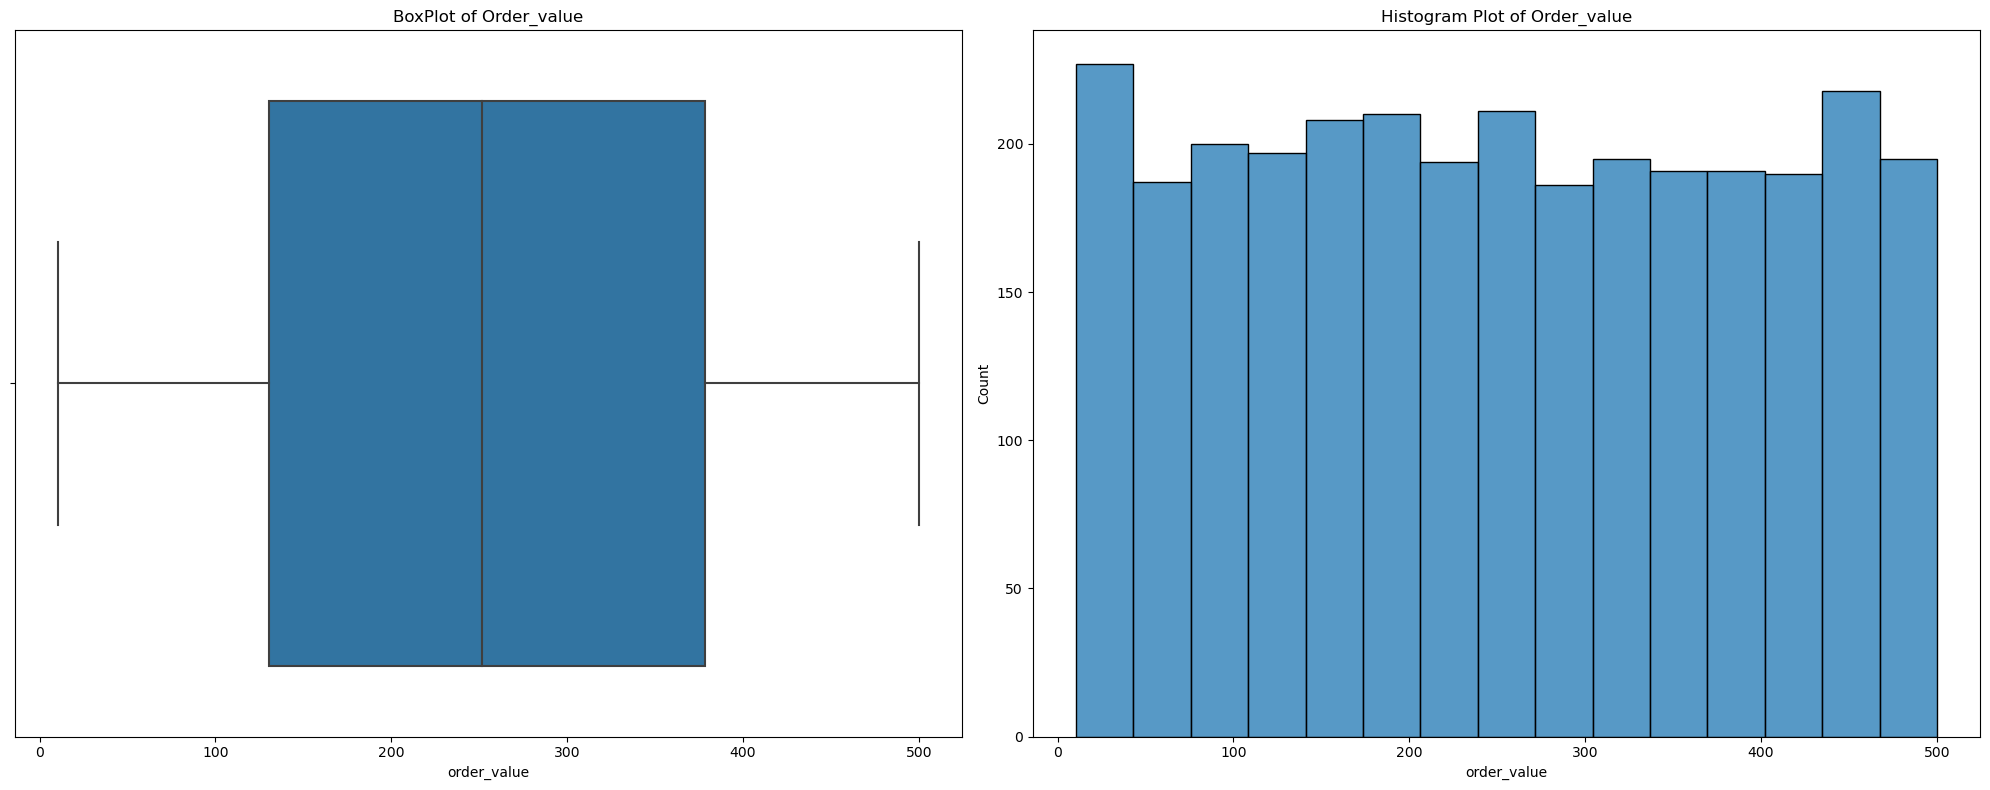

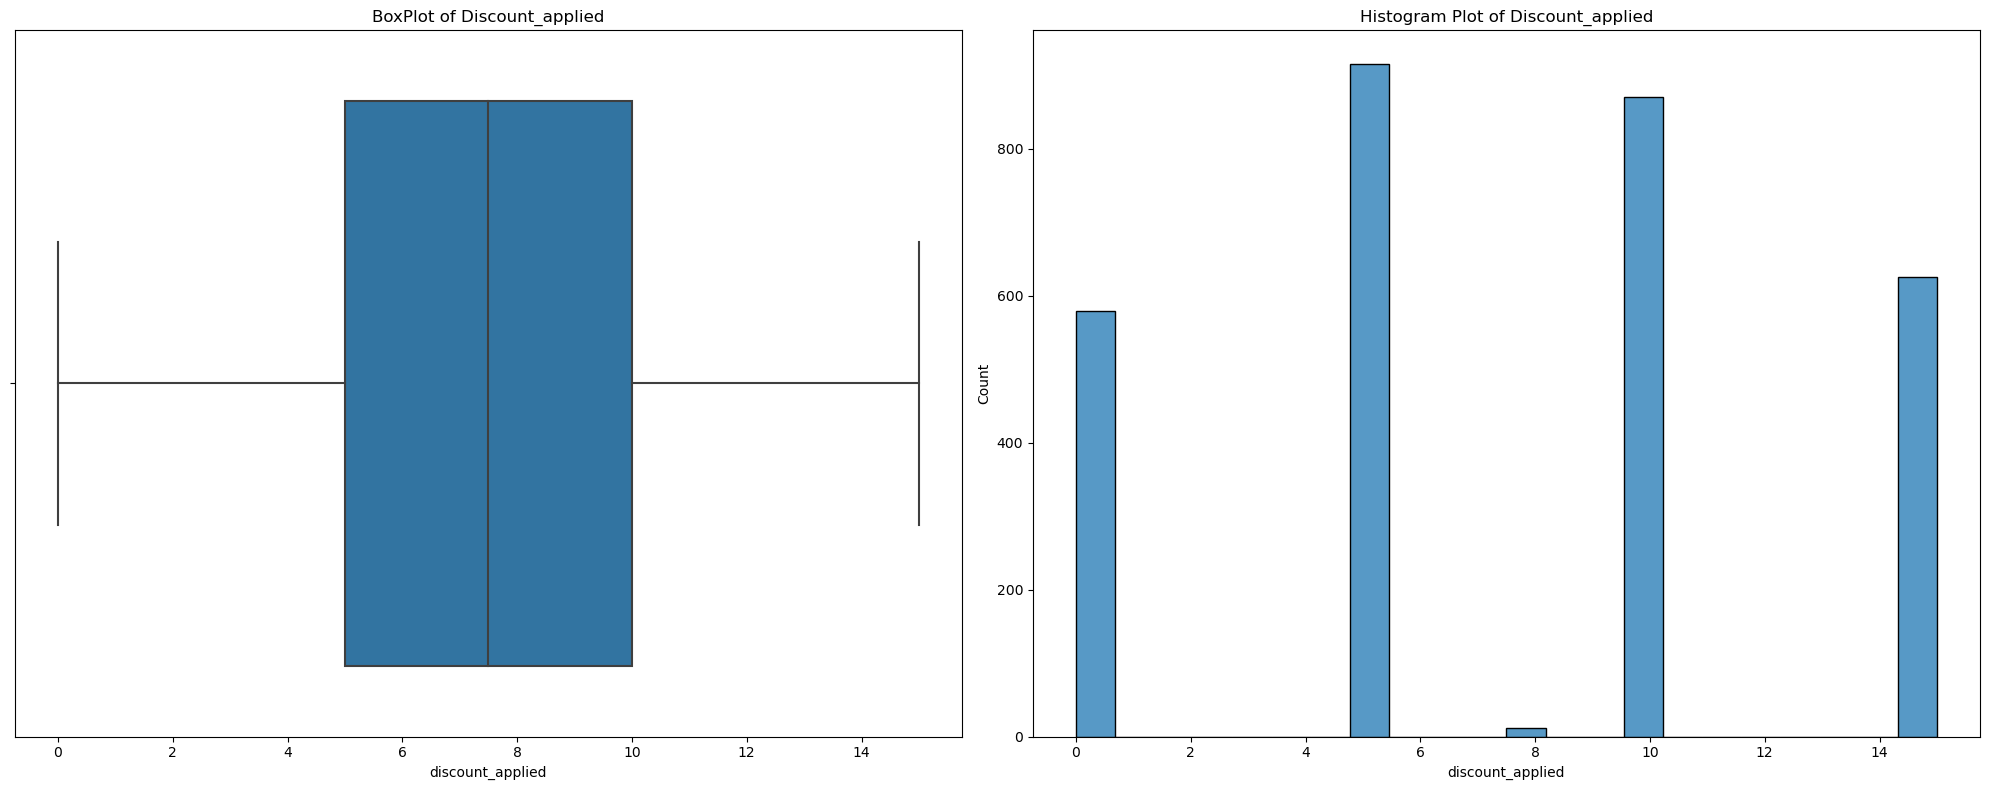

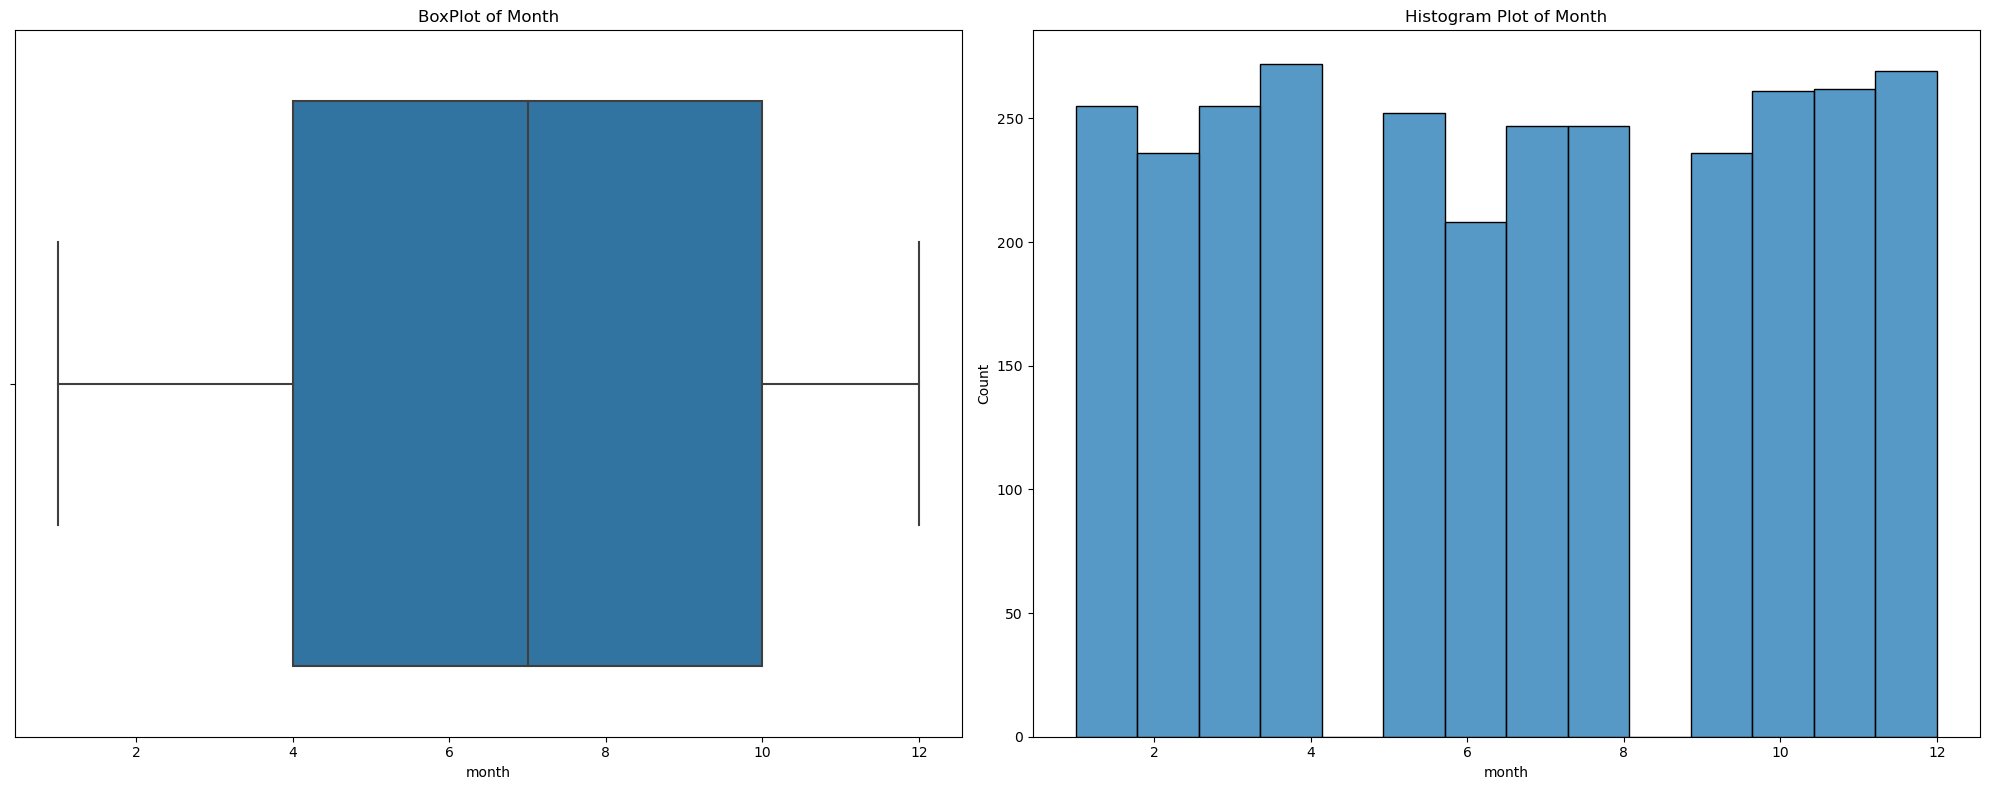

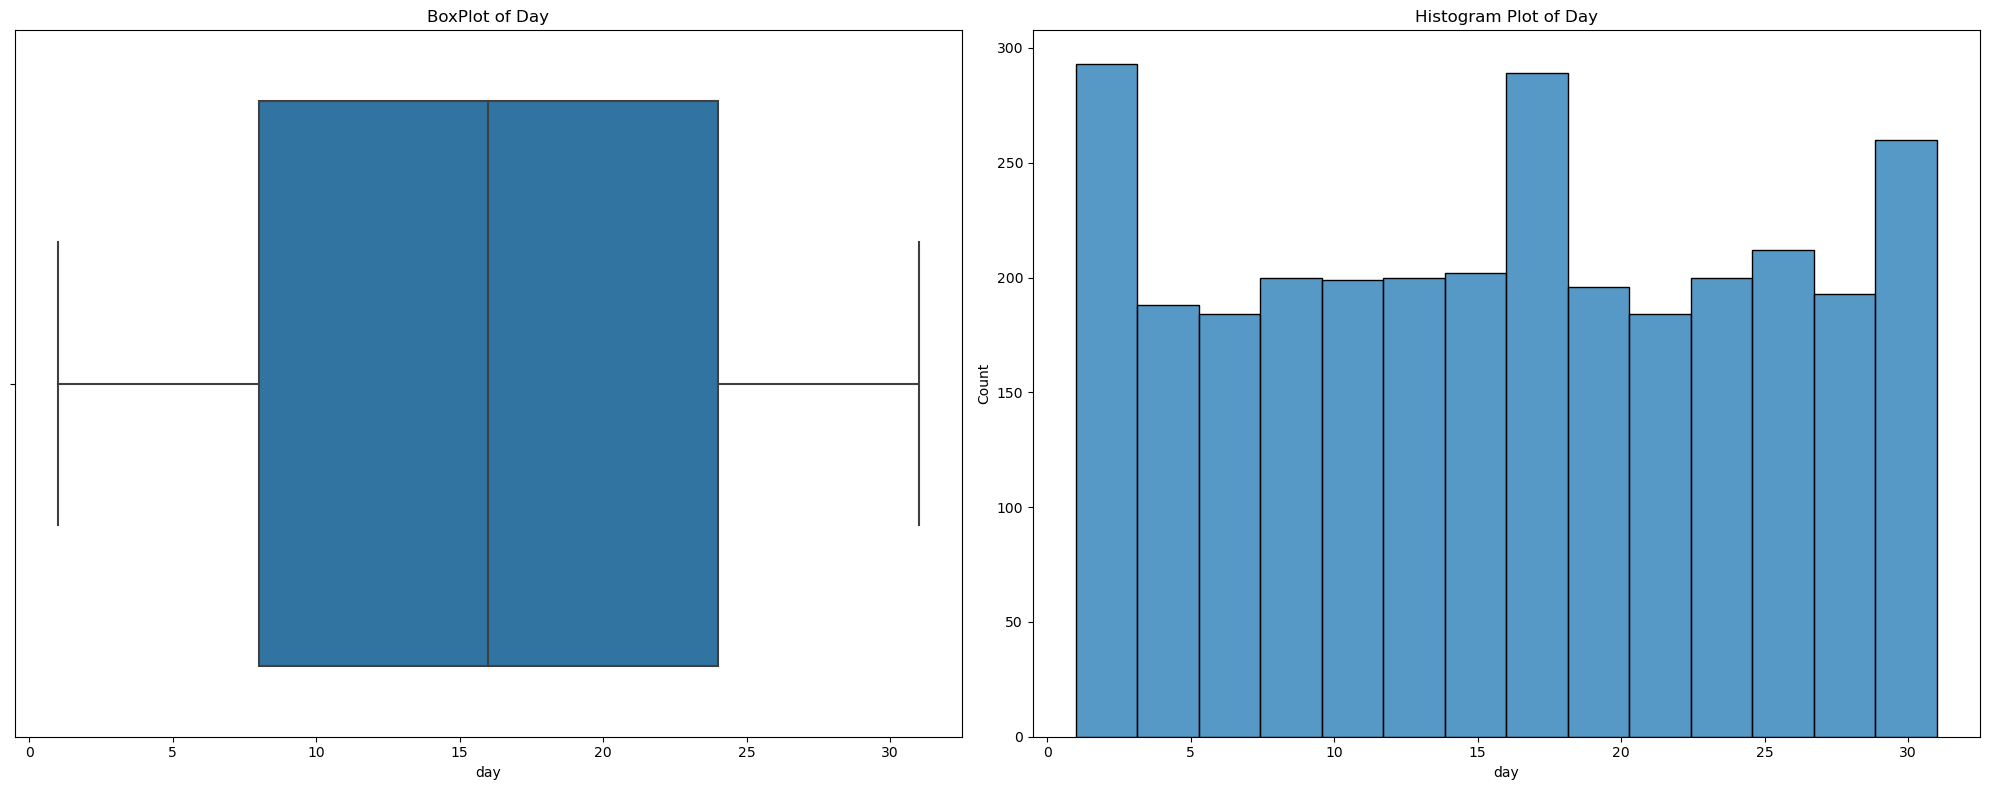

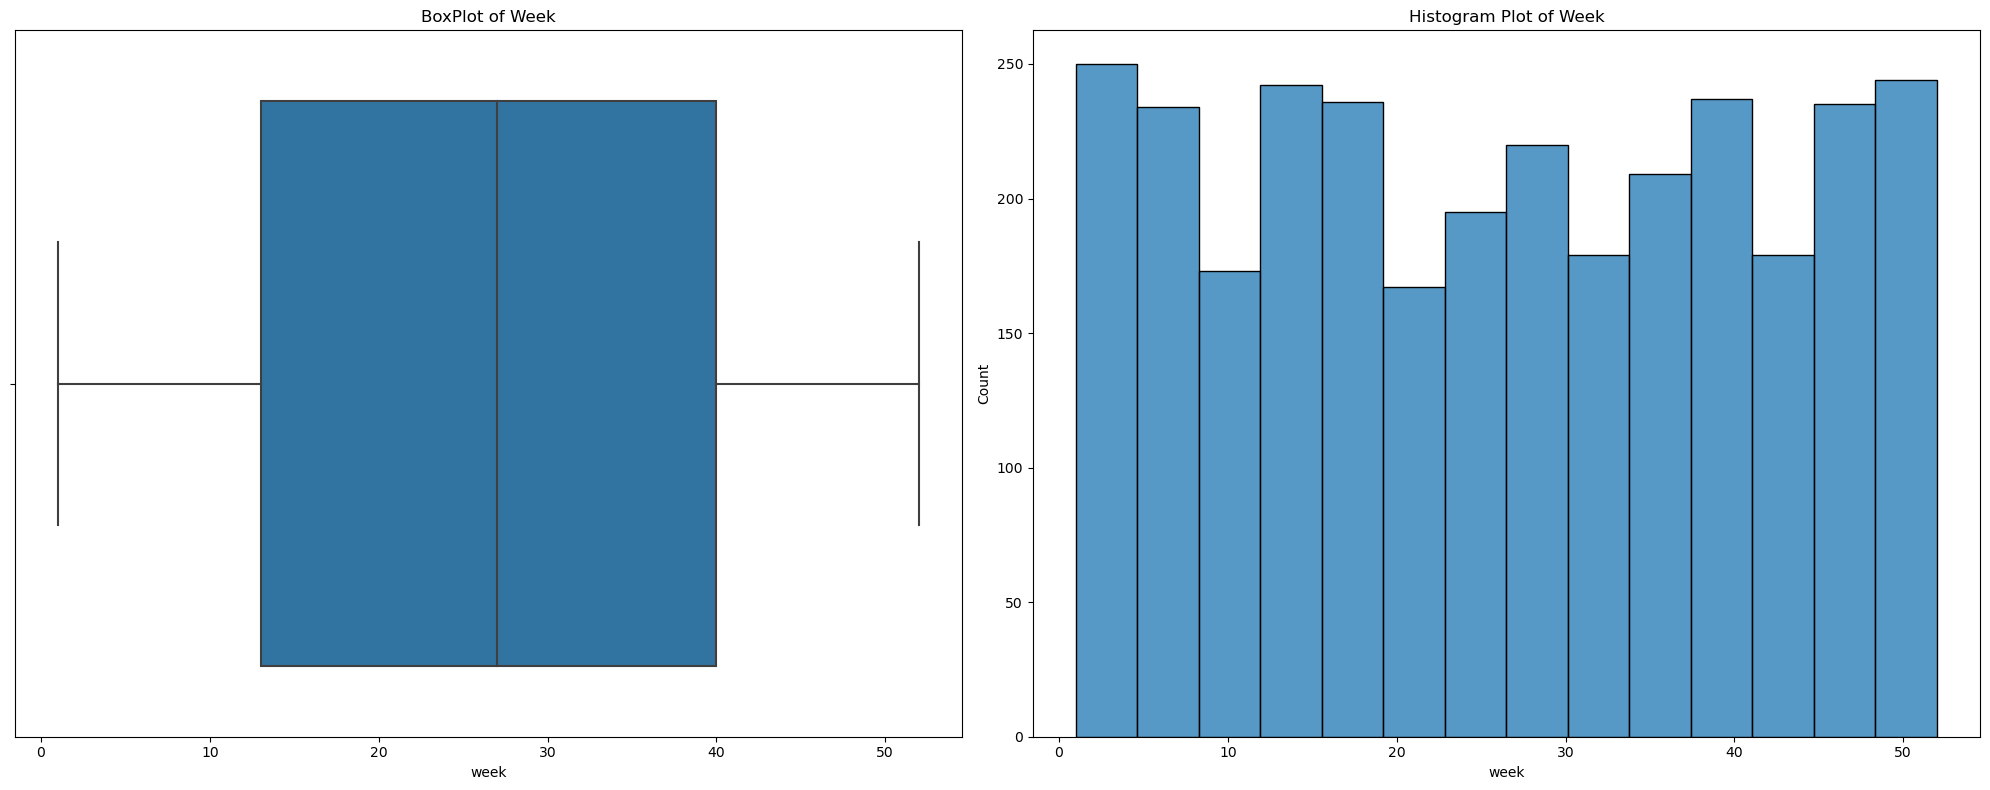

In [15]:
## checking the distribution of all the numerical features and checking for possible outliers through the box plot
for col in numerical_columns:
    plt.figure(figsize=(20, 8))
    
    plt.subplot(121)
    plt.title(f"BoxPlot of {col.capitalize()}")
    sns.boxplot(x = df[col])


    plt.subplot(122)
    plt.title(f"Histogram Plot of {col.capitalize()}")
    sns.histplot(x = df[col])

    plt.tight_layout()
    plt.show()

In [16]:
for c in categorical_columns:
    vc = df[c].value_counts(dropna=False)
    print("\nColumne:", c)
    print("Cardinality:", df[c].nunique(dropna=False))
    print(vc.head(10))


Columne: product_category
Cardinality: 5
Fashion        638
Home           614
Beauty         602
Electronics    592
Groceries      554
Name: product_category, dtype: int64

Columne: payment_method
Cardinality: 4
Bank Transfer    763
Wallet           762
Card             753
USSD             722
Name: payment_method, dtype: int64

Columne: order_status
Cardinality: 3
completed    1025
cancelled     995
refunded      980
Name: order_status, dtype: int64

Columne: region
Cardinality: 50
Connecticut       77
Washington        76
New Mexico        74
Kentucky          70
South Carolina    69
Hawaii            69
Florida           68
Maine             65
Louisiana         65
Georgia           65
Name: region, dtype: int64

Columne: weekday
Cardinality: 7
Tuesday      484
Wednesday    444
Saturday     434
Sunday       433
Thursday     424
Monday       401
Friday       380
Name: weekday, dtype: int64

Columne: month_name
Cardinality: 12
April        272
December     269
November     262
Octo

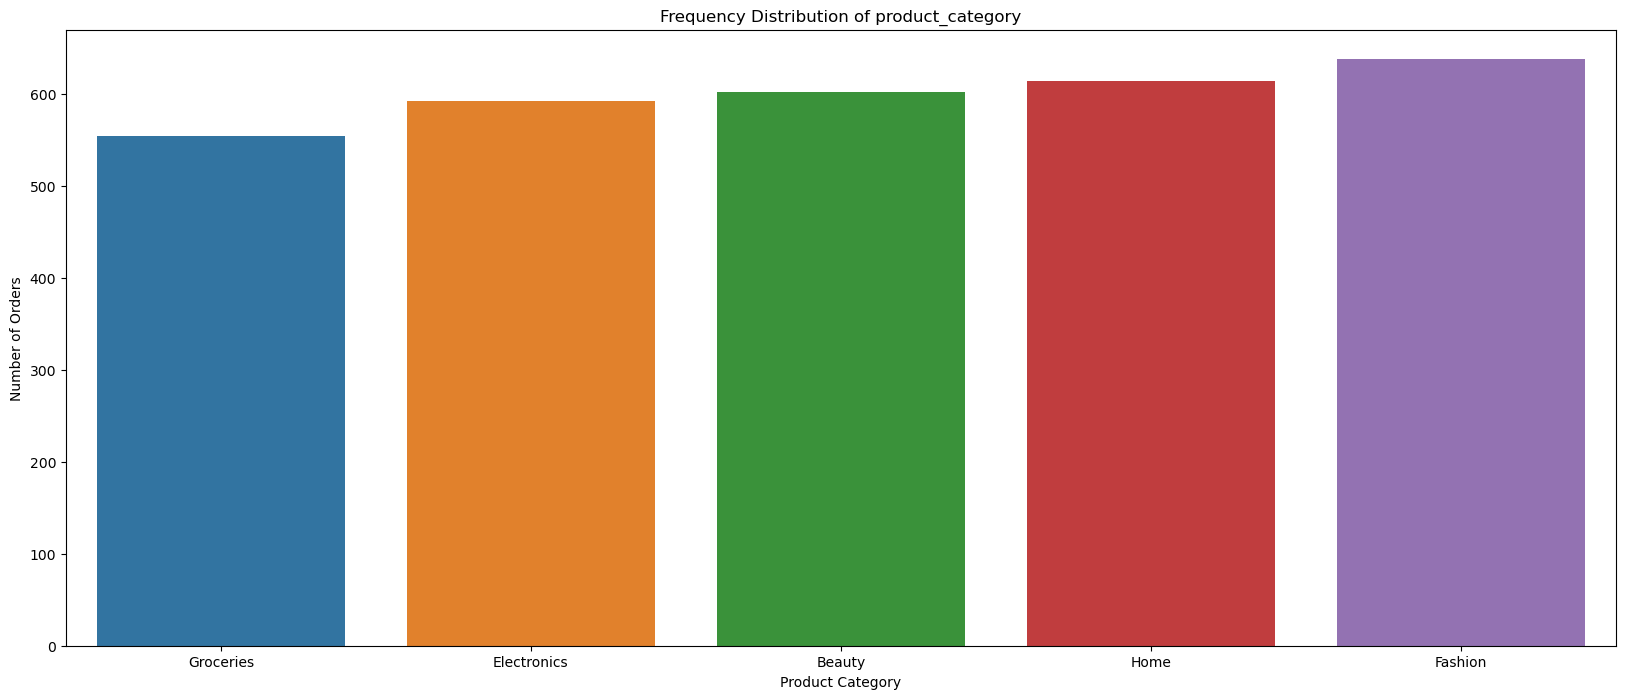

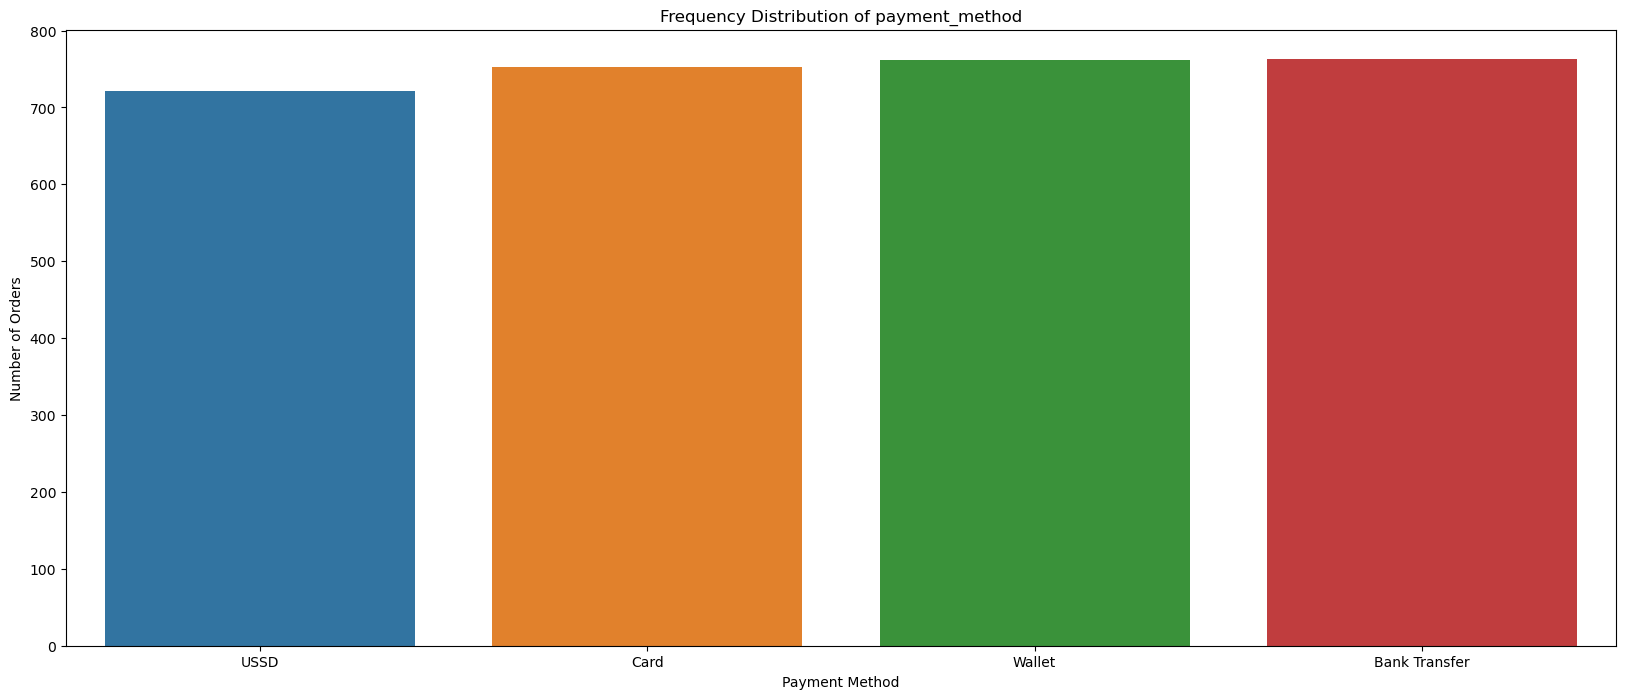

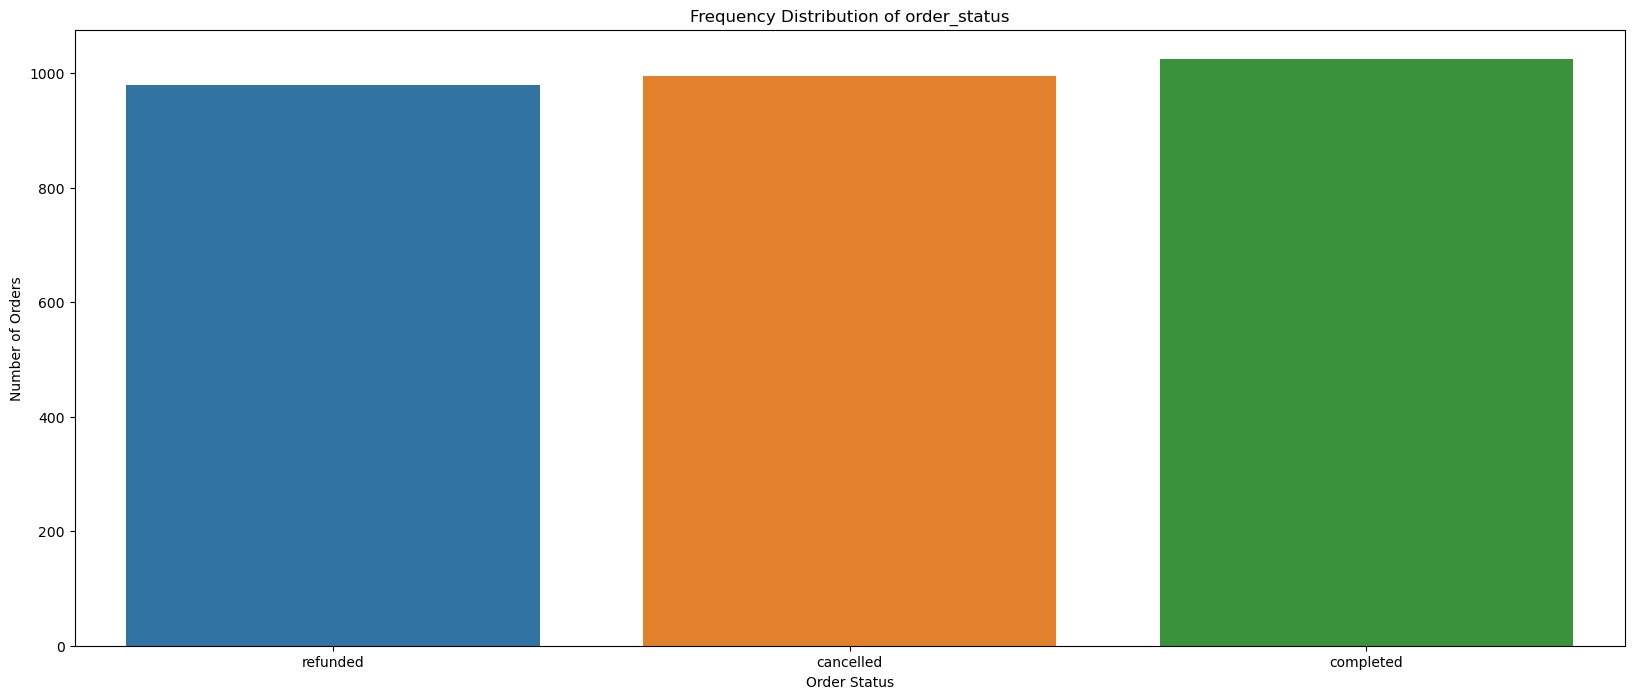

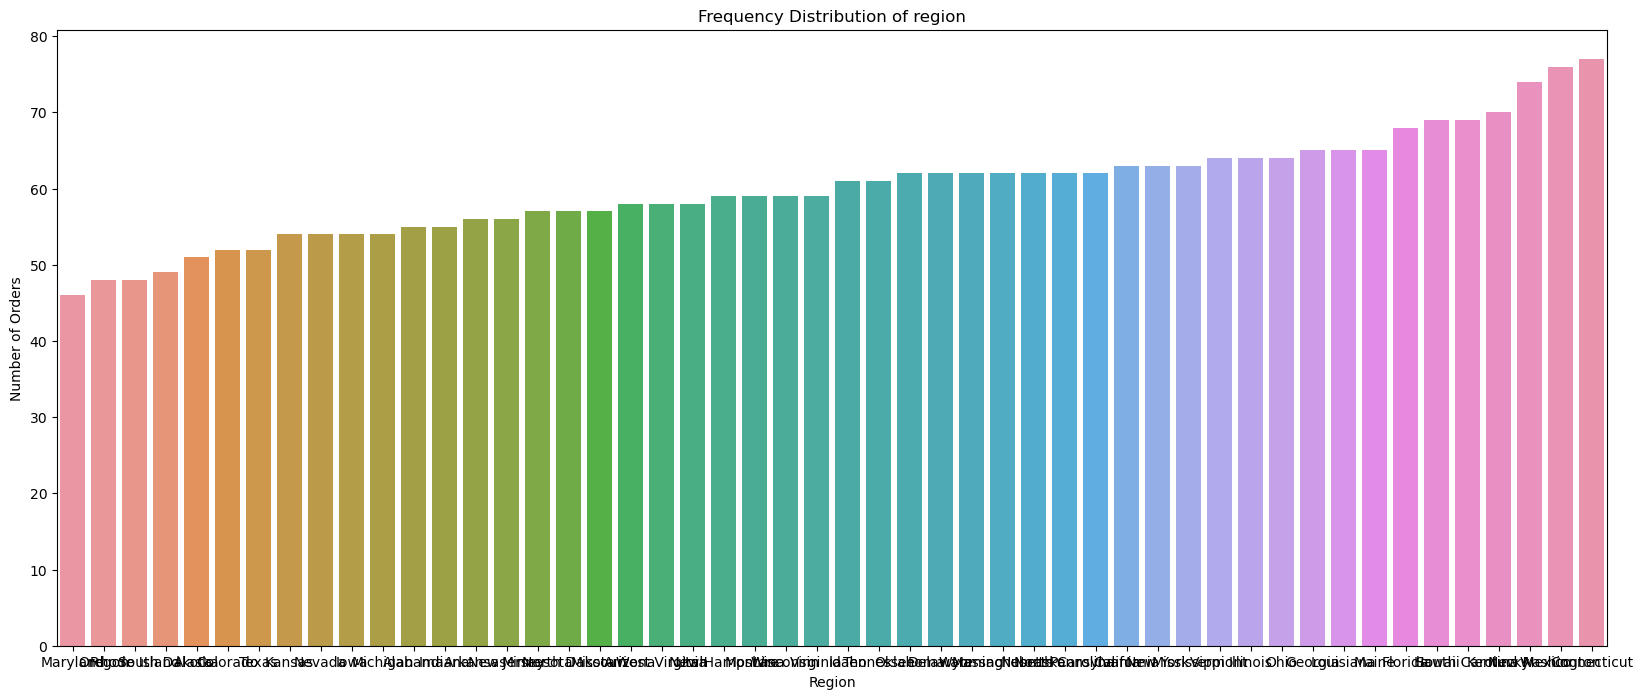

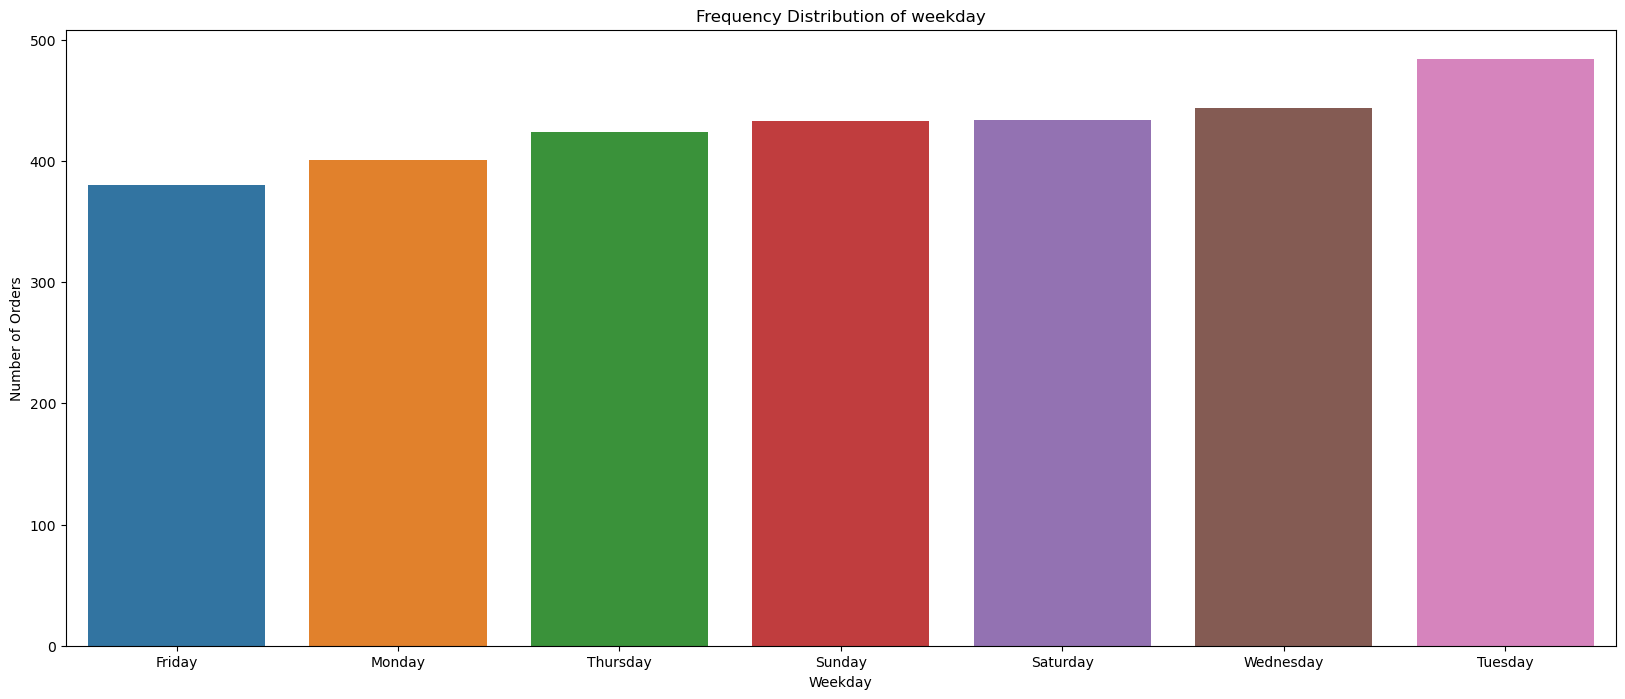

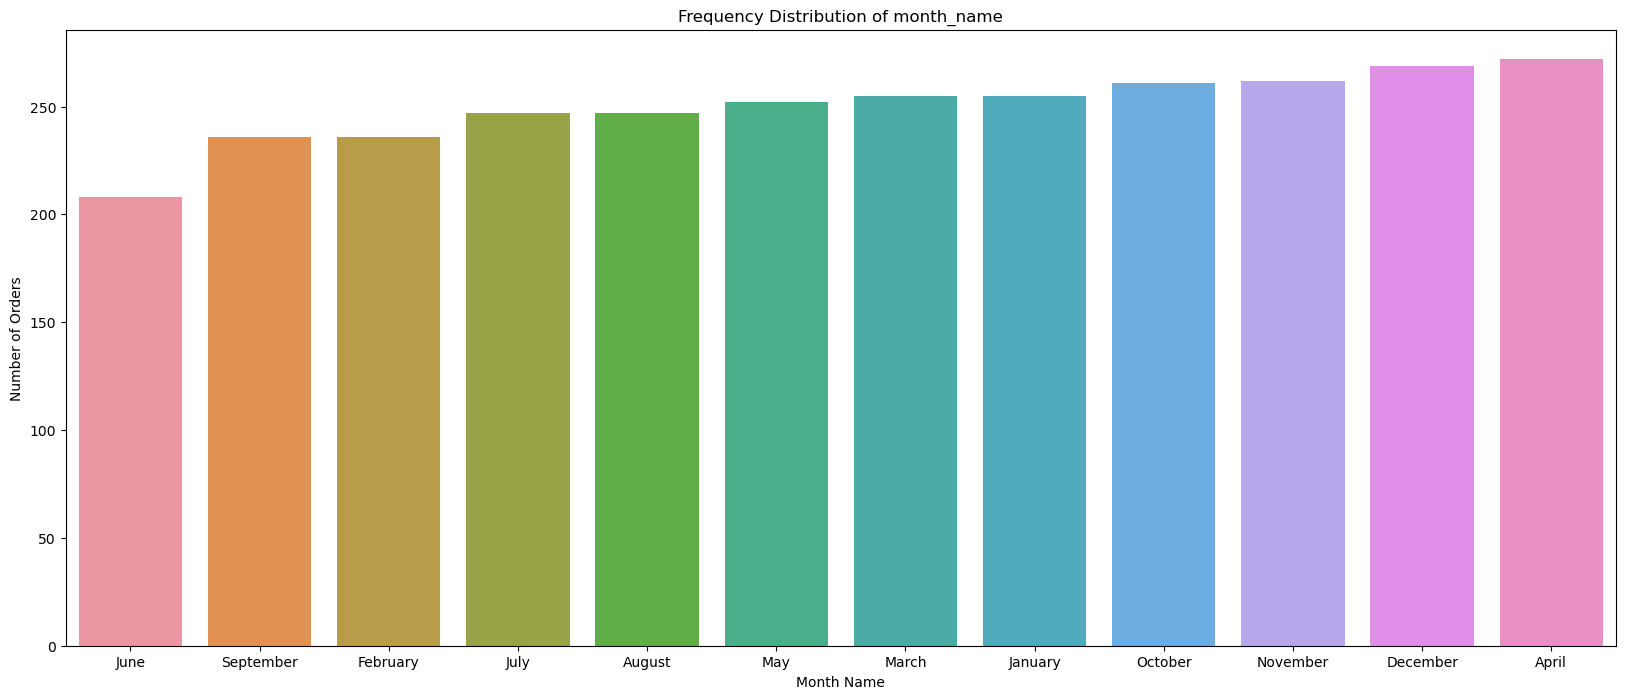

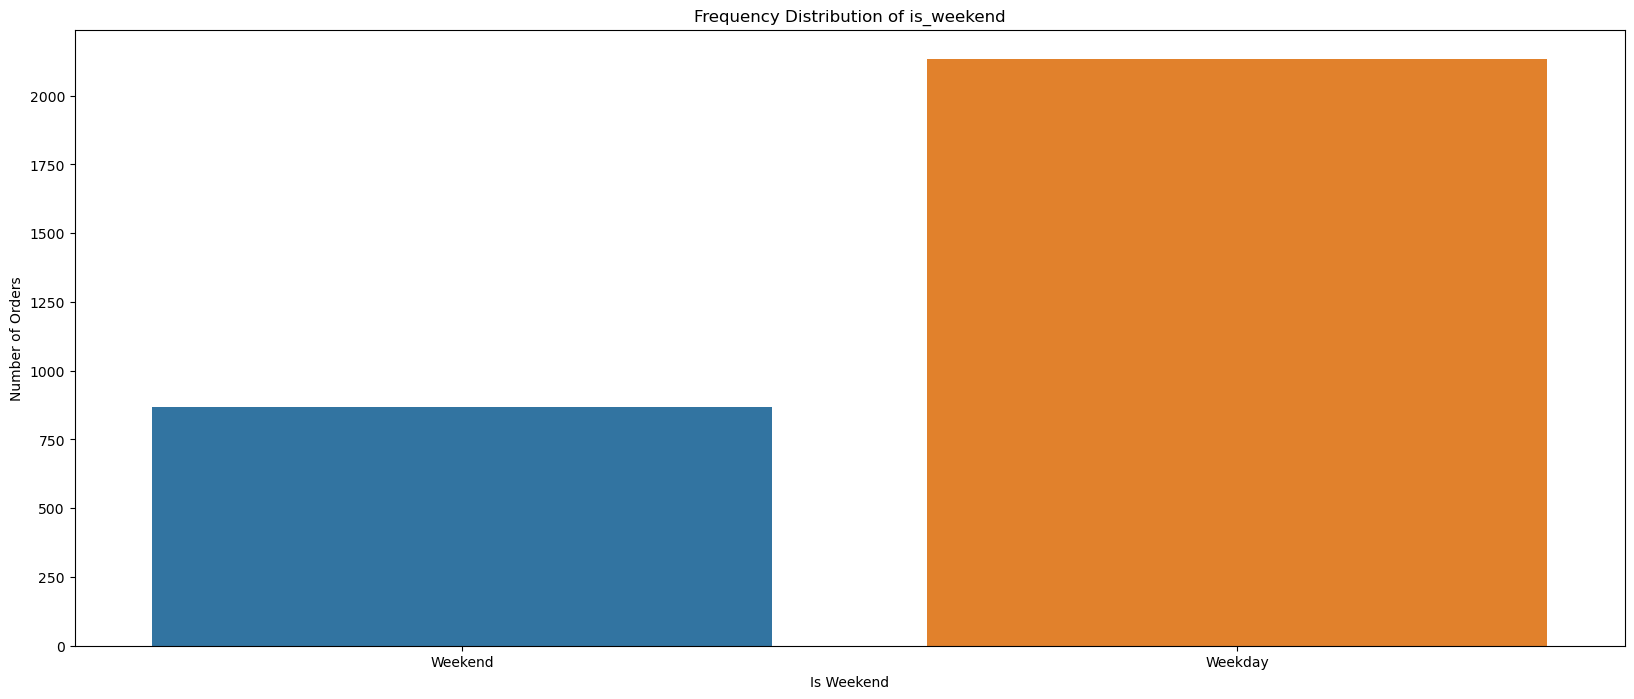

In [14]:
for col in categorical_columns:
    plt.figure(figsize=(20, 8)) 
    
    #  Calculate the order
    category_order = df[col].value_counts().sort_values(ascending=True).index
    
      #Pass the order to the countplot
    sns.countplot(data=df, x=col, order=category_order) 
    
    plt.title(f'Frequency Distribution of {col}')
    plt.ylabel('Number of Orders')
    plt.xlabel(col.replace('_', ' ').title()) 
    plt.show()
    

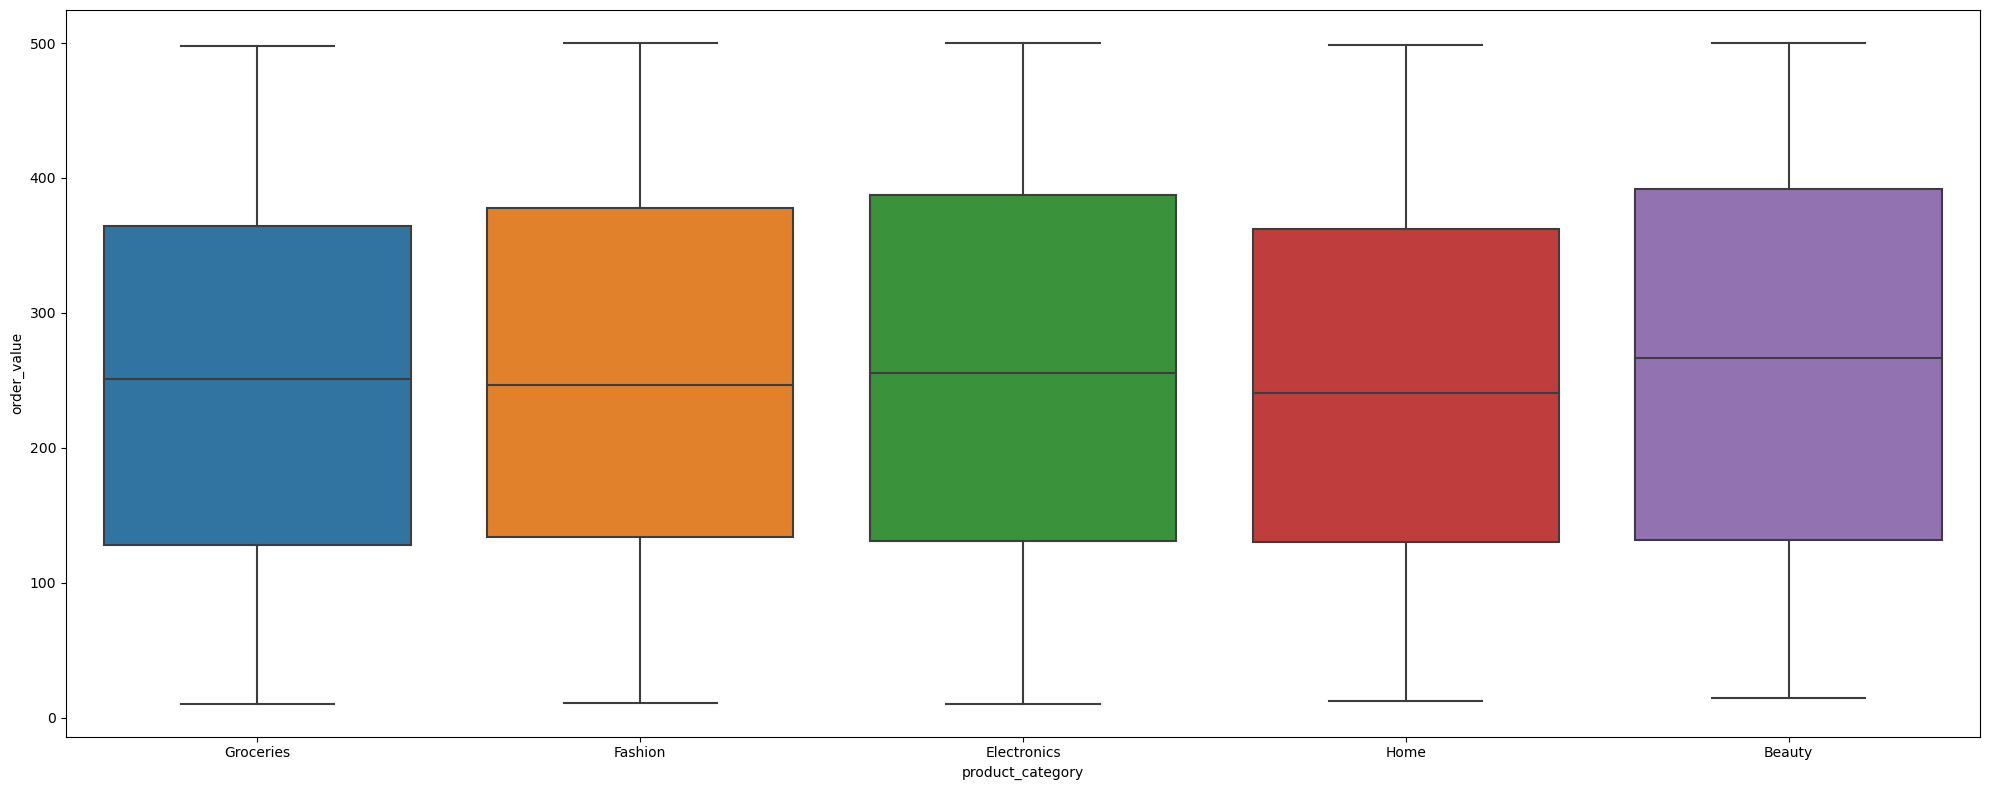

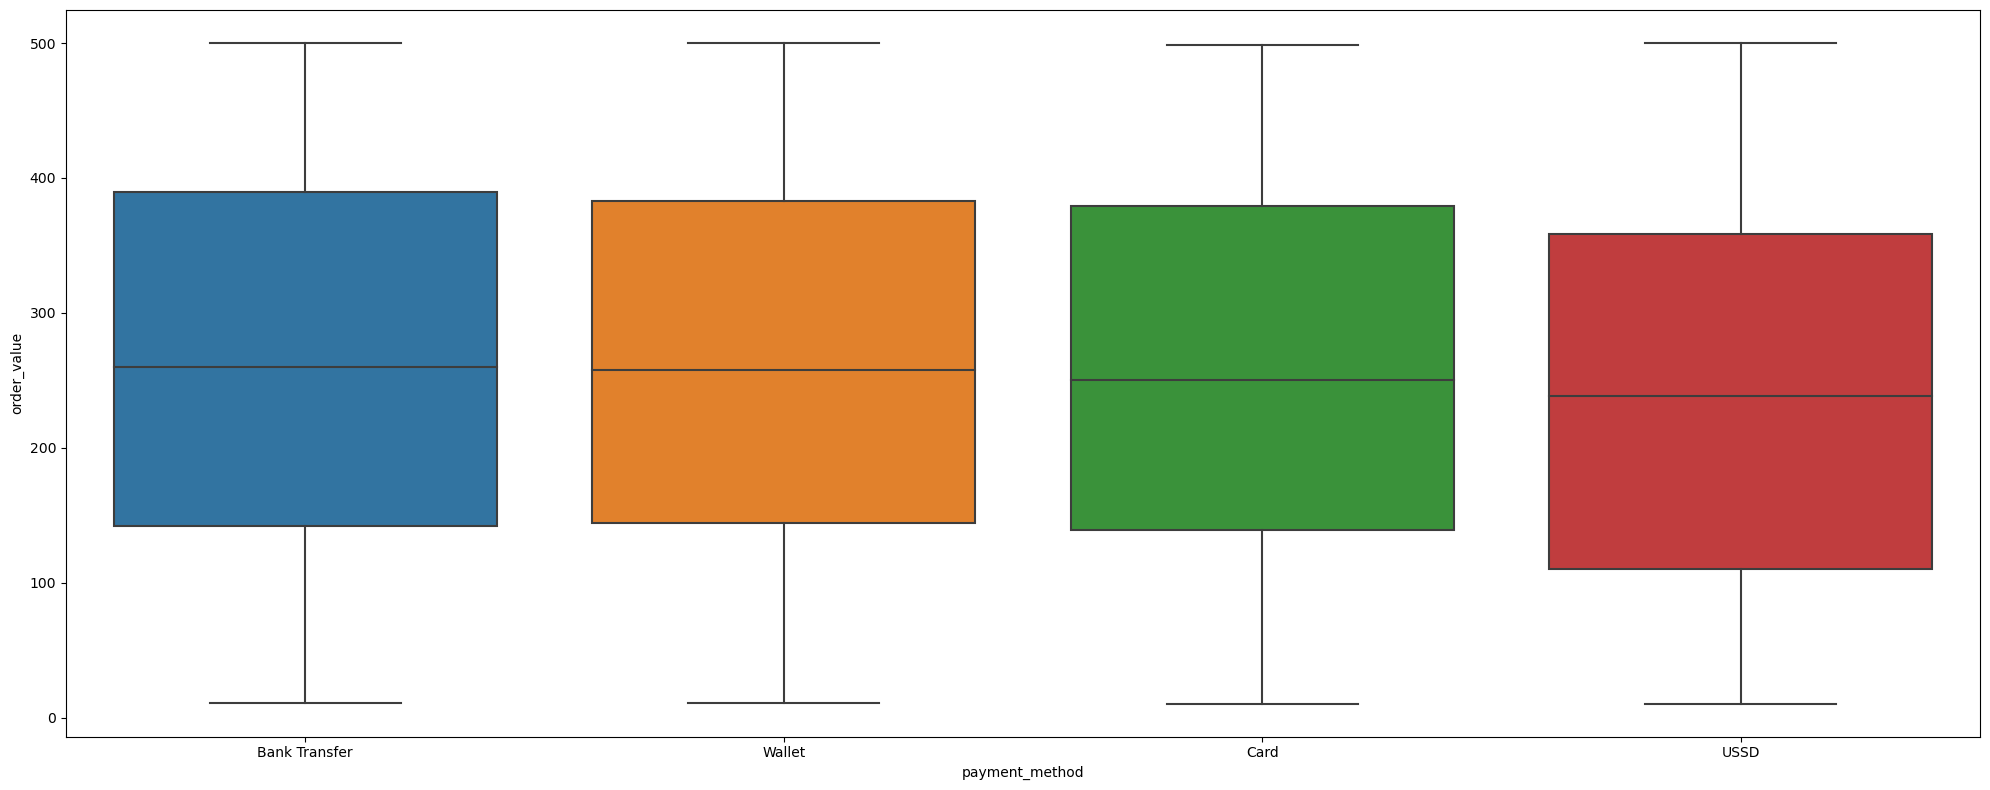

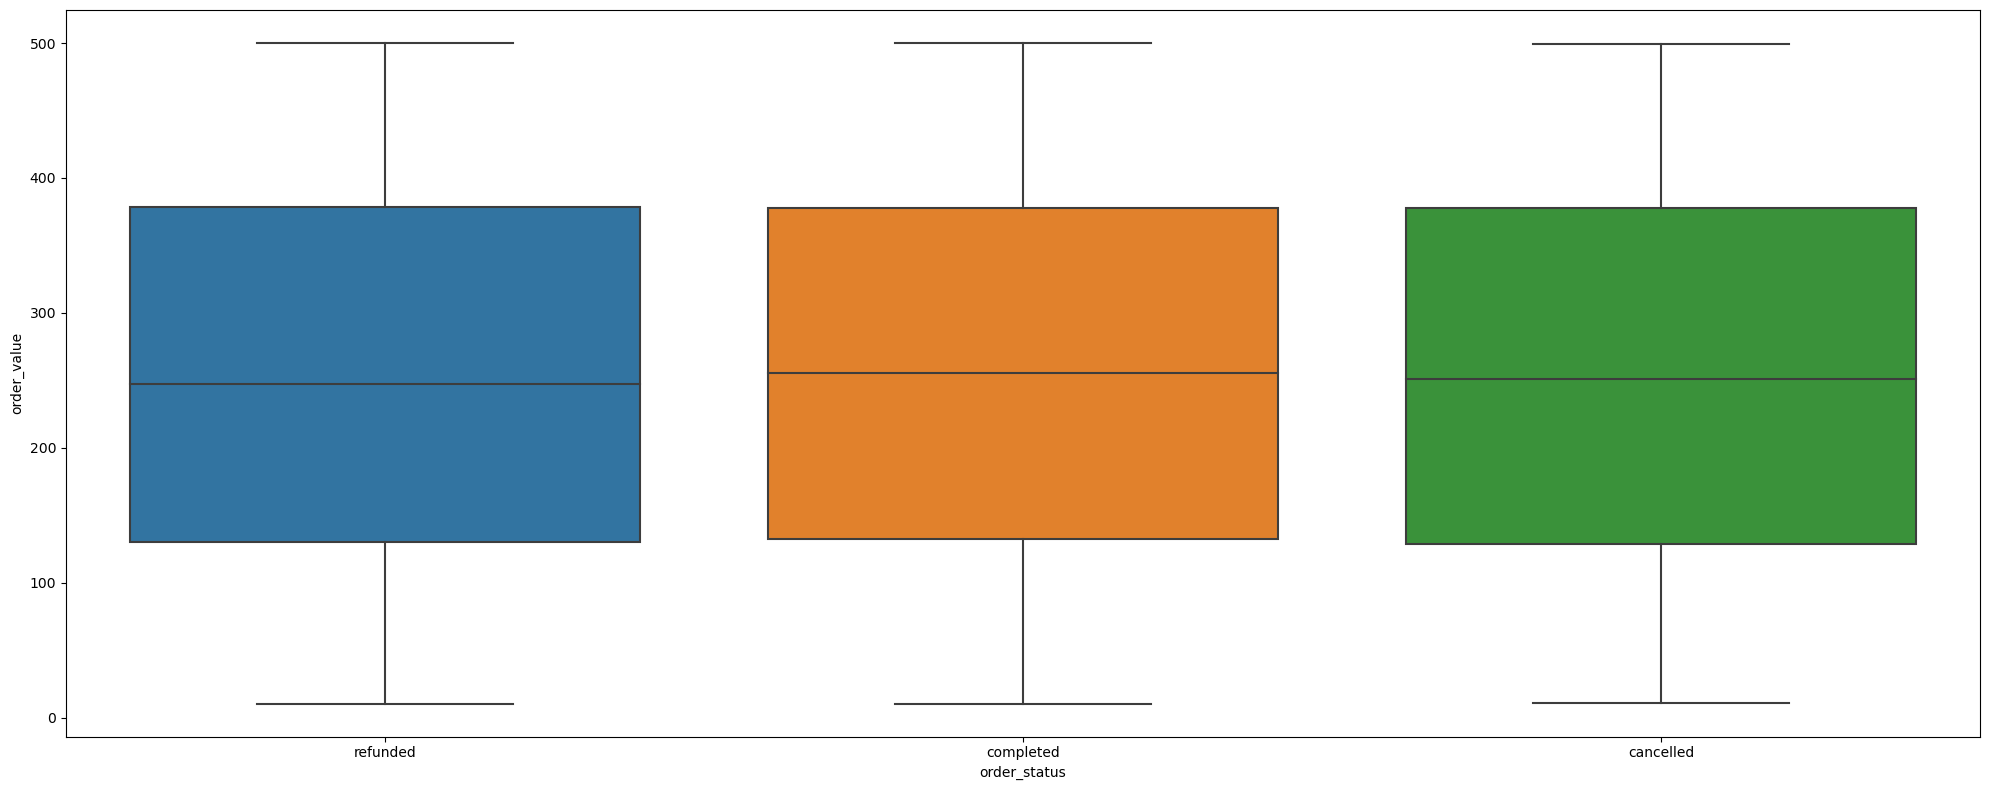

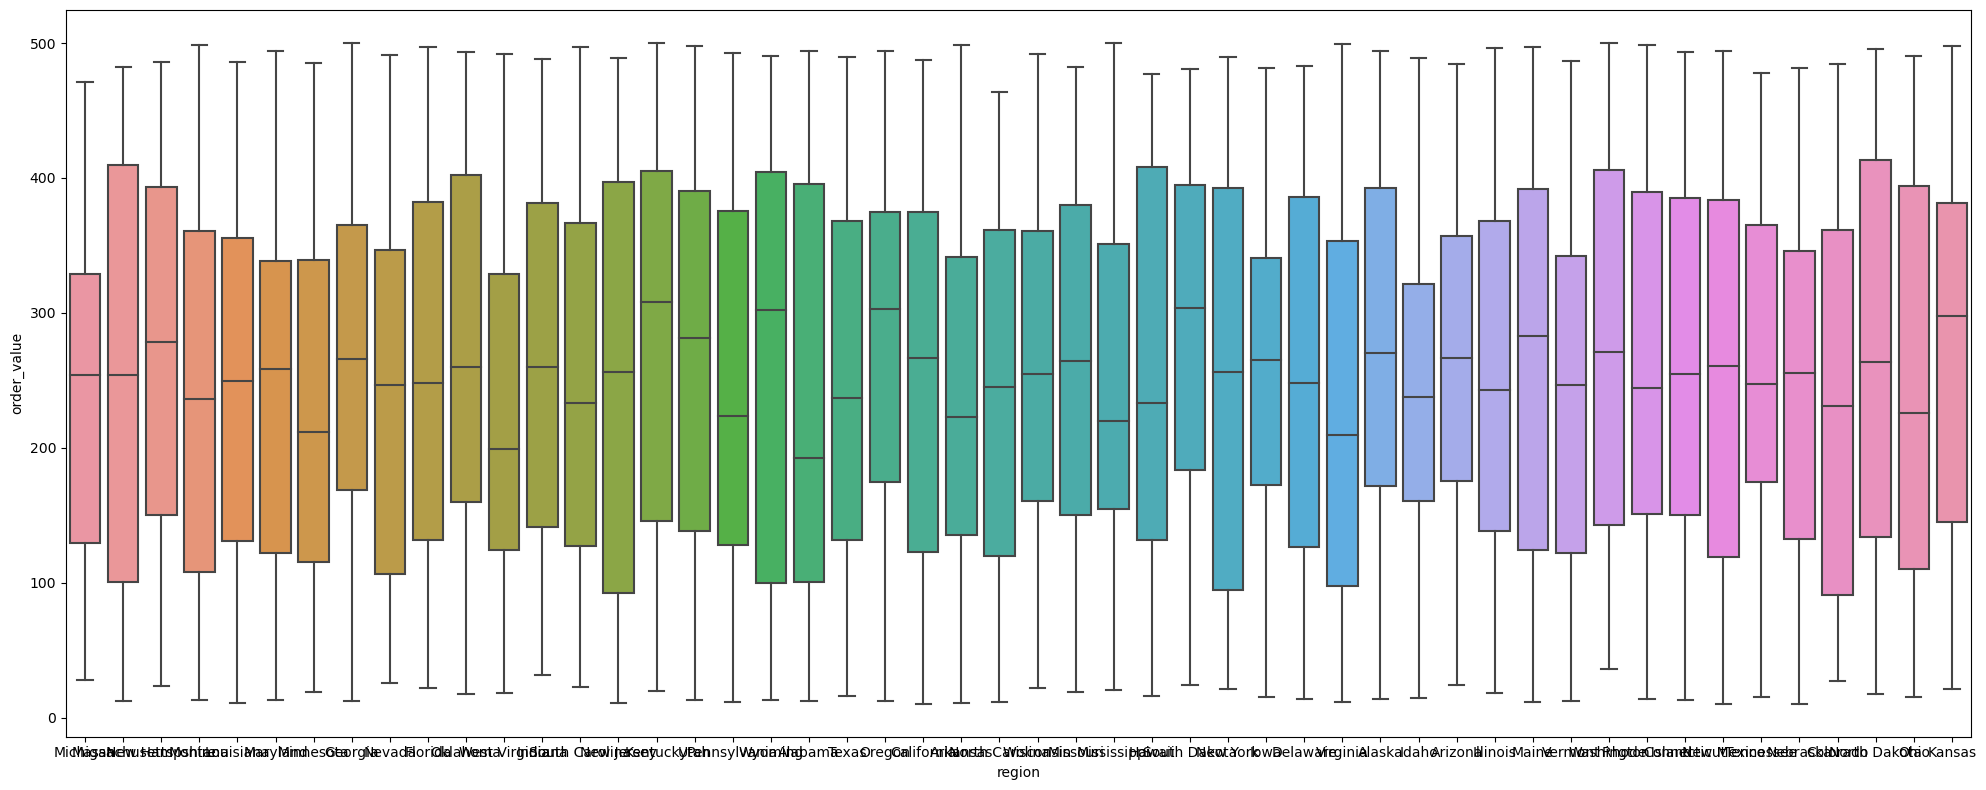

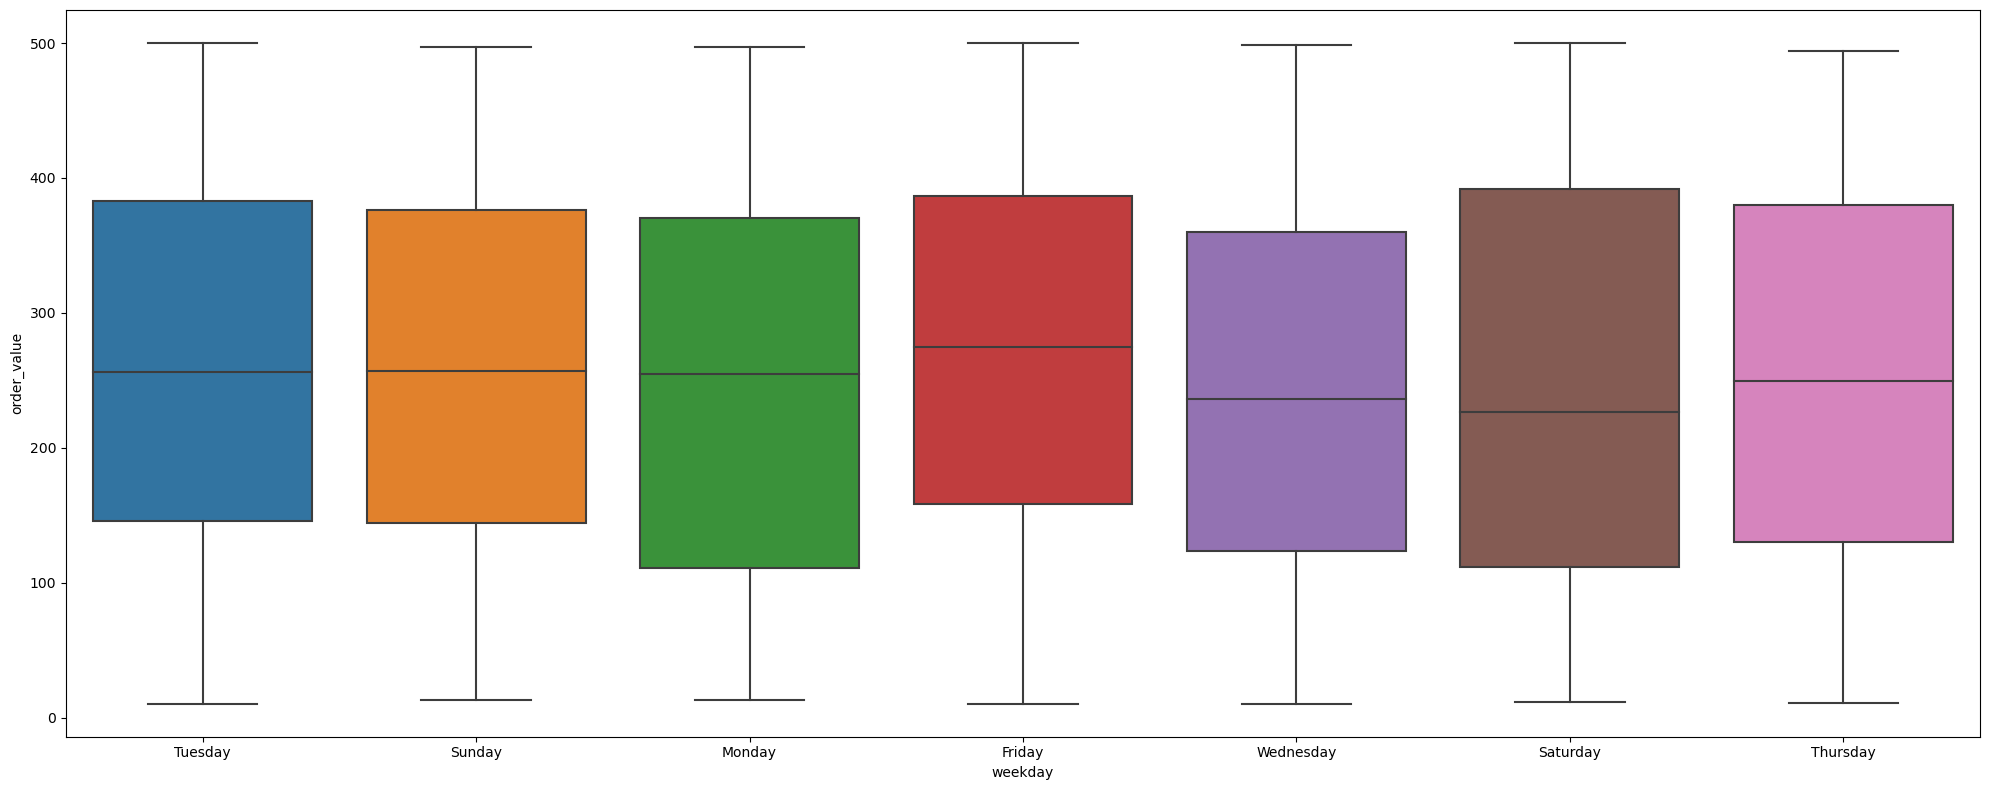

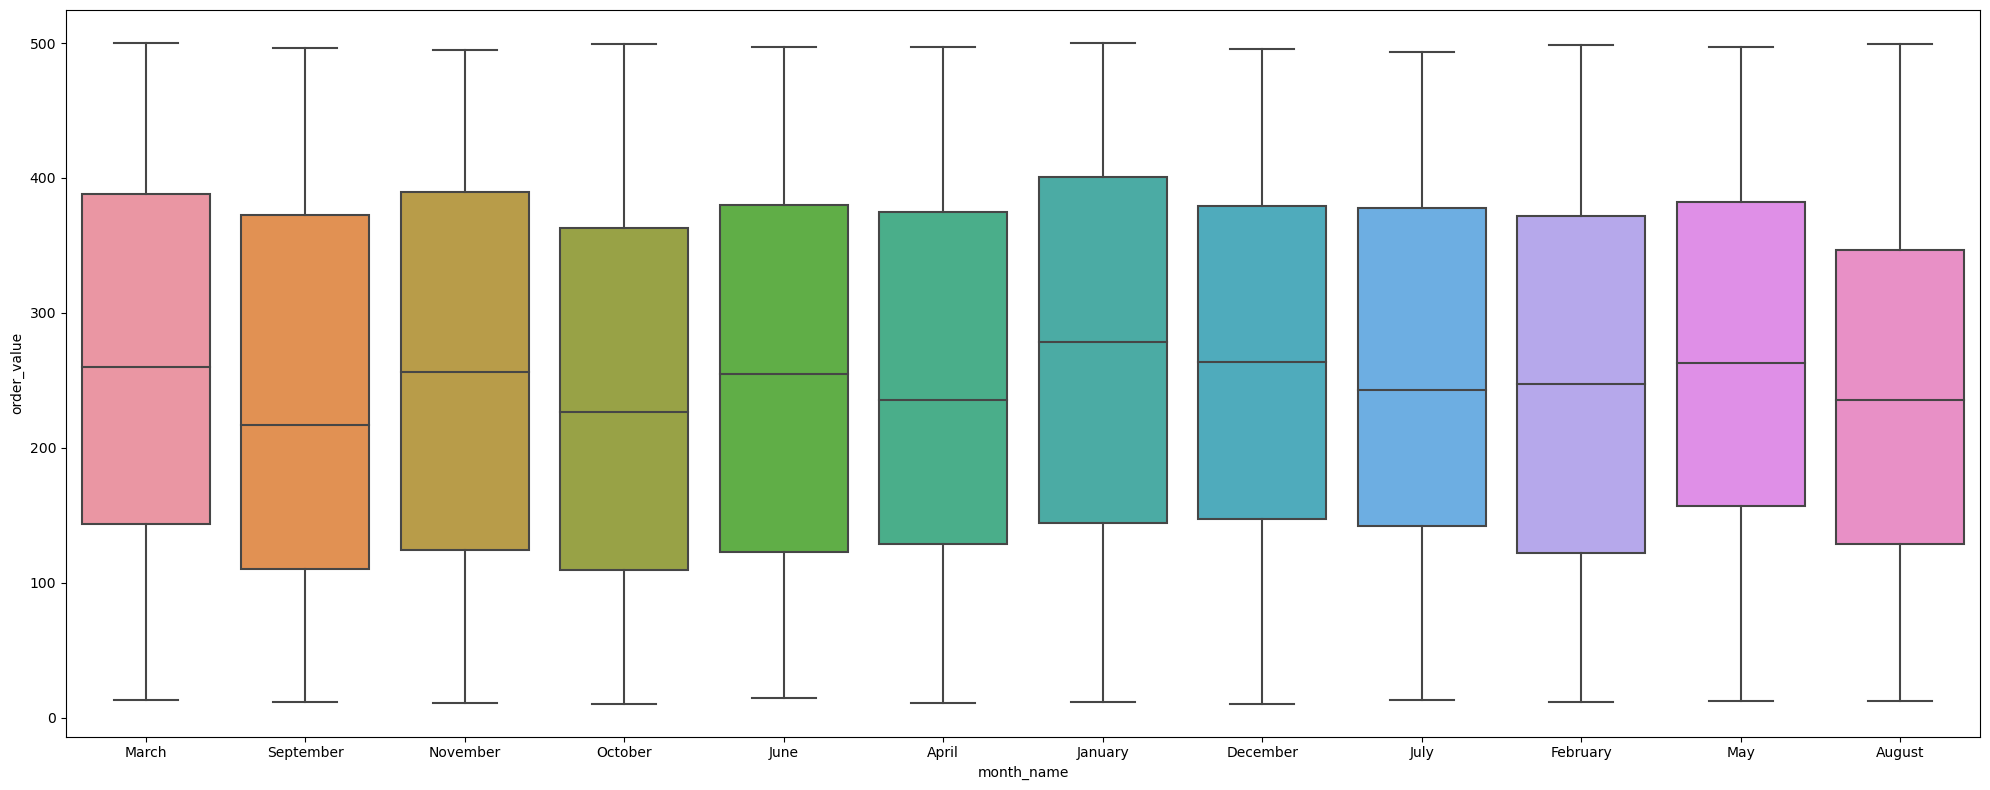

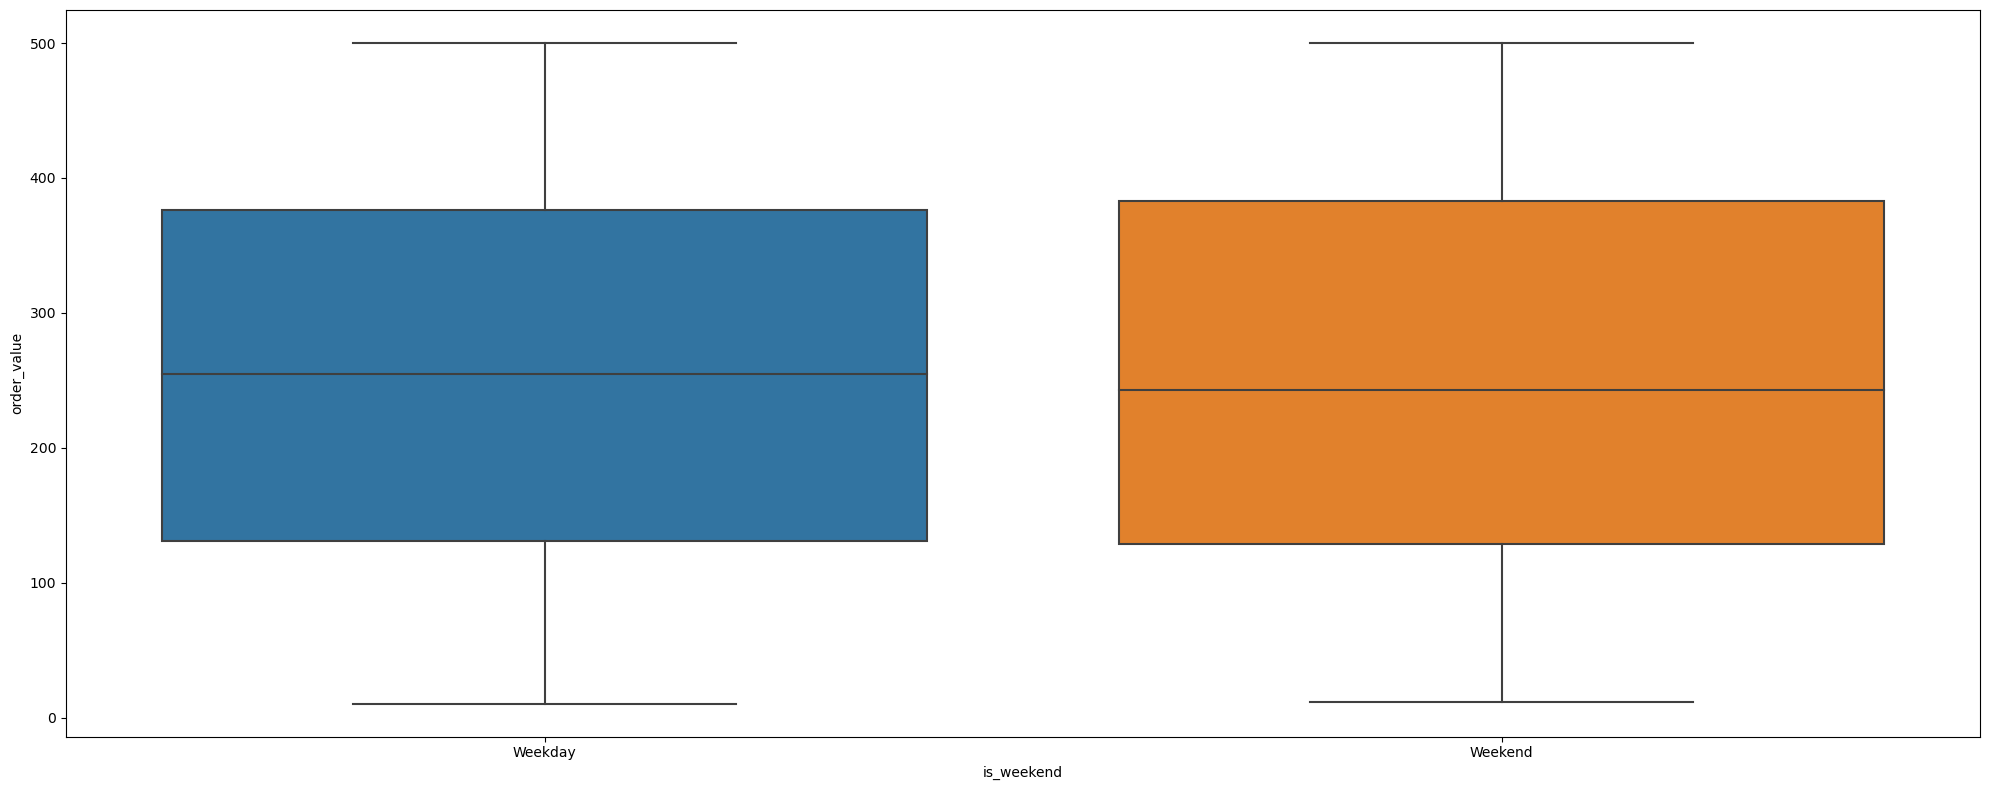

In [18]:
for col in categorical_columns:
    plt.figure(figsize=(20 ,8))
    
    sns.boxplot(x = df[col], y = df['order_value'])
    
    
    plt.tight_layout()
    plt.show()

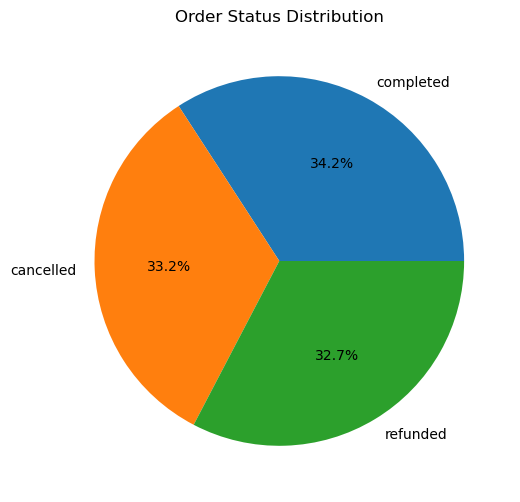

In [15]:
#Distribution of Order Status

order_status_count = df['order_status'].value_counts()

order_status_count.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Order Status Distribution")
plt.ylabel("")
plt.show()

In [16]:
##A cancelled order is an order that was placed but stopped before fulfillment.
##A completed order means the transaction was successful from start to finish.
##A refunded order is an order that was completed initially but later reversed.

### Best-Selling Product Categories

In [19]:
##Best Selling Product Categories
product_revenue = (
    df[df['order_status'] == 'completed']
    .groupby('product_category')['order_value']
    .sum()
    .sort_values(ascending=False))

product_revenue

product_category
Home           56116.08
Fashion        52016.71
Beauty         51252.93
Electronics    50808.33
Groceries      50079.83
Name: order_value, dtype: float64

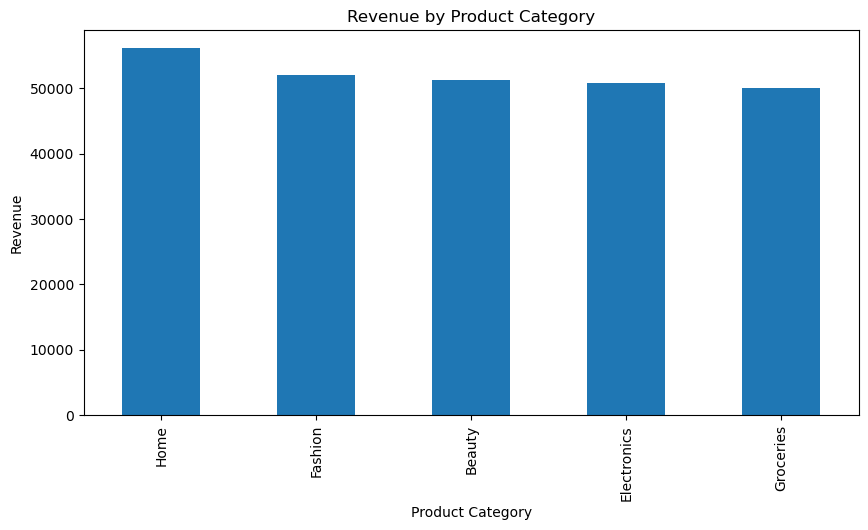

In [22]:
product_revenue.plot(kind='bar', figsize=(10,5))
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.xlabel("Product Category")
plt.show()

In [23]:
#best seling product in terms of total revunue is home (56116.08)
#less seling prodcut in terms of total revenue is Groceries(50079.83)

### Averge Reveune (mean) per product

In [20]:
##Best Selling Product Categories
product_revenue_mean = (
    df[df['order_status'] == 'completed']
    .groupby('product_category')['order_value']
    .mean()
    .sort_values(ascending=False)
)

product_revenue_mean

product_category
Beauty         272.621968
Electronics    256.607727
Home           250.518214
Groceries      249.153383
Fashion        243.068738
Name: order_value, dtype: float64

In [25]:
#best seling product in terms of average revunue is Beauty ( 272.621968 )
#less seling prodcut in terms of average revenue is Fashion (243.068738)

Best-Selling Products (Completed Orders)

The Home category generated the highest total revenue, making it the top-performing product in terms of overall sales. Beauty products had the highest average revenue per order, showing that customers spend more per transaction when purchasing these items.

Implication: Focus marketing, promotions, and inventory on Home and Beauty products to maximize revenue.

Least-Selling Products (Completed Orders)

Groceries had the lowest total revenue among completed orders, while Fashion had the lowest average revenue per order. This indicates lower customer spend or demand in these categories.

Implication: Consider improving product appeal, adjusting pricing, or running targeted campaigns to increase sales for Groceries and Fashion.

### worst-Selling Product Categories

In [26]:
##worst-Selling Product Categories
loss_revenue = (
    df[df['order_status'] == 'refunded']
    .groupby('product_category')['order_value']
    .sum()
    .sort_values(ascending=False)
)

loss_revenue

product_category
Fashion        57563.58
Electronics    52992.45
Beauty         49729.25
Home           46534.01
Groceries      41591.24
Name: order_value, dtype: float64

In [27]:
#worst seling product in terms of total revunue is Fashion (57563.58)

#worst seling prodcut in terms of total revenue is Groceries(41591.24)

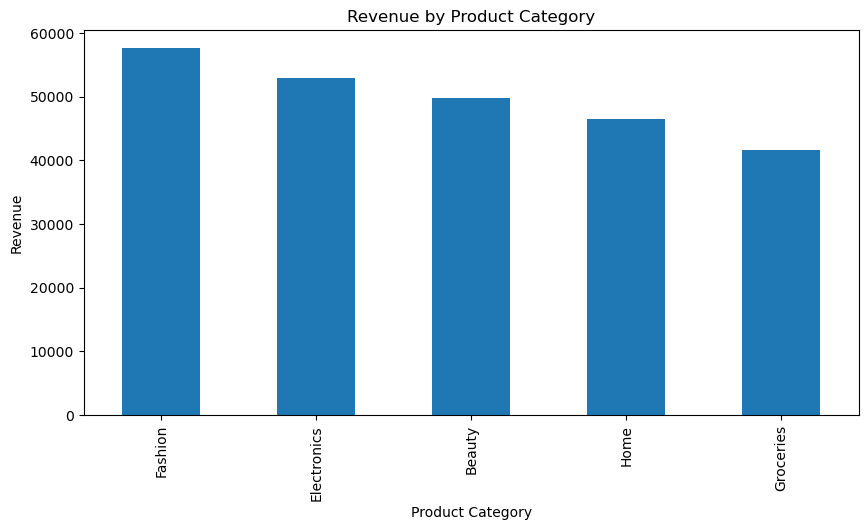

In [28]:
loss_revenue.plot(kind='bar', figsize=(10,5))
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.xlabel("Product Category")
plt.show()

In [21]:
##worst-Selling Product Categories
loss_revenue_mean = (
    df[df['order_status'] == 'refunded']
    .groupby('product_category')['order_value']
    .mean()
    .sort_values(ascending=False)
)

loss_revenue_mean

product_category
Electronics    266.293719
Fashion        261.652636
Home           250.182849
Beauty         243.770833
Groceries      243.223626
Name: order_value, dtype: float64

In [30]:
#worst seling product in terms of aveverage revunue is Electronics (266.293719)

#worst seling prodcut in terms of average revenue is Groceries(243.223626)

Refunded orders reveal lost revenue and potential customer dissatisfaction. Fashion and Groceries showed the highest total refunded revenue, while Electronics and Groceries had the lowest average revenue per refunded order.

Implication: High refund rates suggest issues with product quality, descriptions, or delivery. Addressing these issues will reduce losses and improve customer satisfaction.

### Region with the most revenue


In [31]:
mask_1 = df['order_status'] == "completed"
#mask_2  = 
region_best_sellling = df[mask_1].groupby('region')['order_value'].sum().sort_values(ascending = False)
region_best_sellling

region
Wyoming           8095.00
Connecticut       7133.98
Kentucky          7112.63
Arizona           7005.05
Utah              6974.28
South Carolina    6510.53
Nebraska          6451.18
California        6445.42
Wisconsin         6410.10
North Dakota      6114.70
Virginia          6098.34
Ohio              6089.60
Georgia           6028.13
Illinois          5977.23
Pennsylvania      5972.20
Louisiana         5796.25
Massachusetts     5733.62
New Hampshire     5619.97
Maine             5502.45
Oklahoma          5451.90
Tennessee         5406.59
Mississippi       5338.41
New Jersey        5289.14
Oregon            5210.47
Florida           5076.55
Missouri          5052.41
Vermont           5050.09
New York          5018.35
Washington        4982.25
Hawaii            4926.82
Alaska            4895.12
Michigan          4866.95
Maryland          4821.94
Colorado          4765.95
Nevada            4528.89
Iowa              4514.71
North Carolina    4406.51
South Dakota      4380.90
Delaw

## Loss Incured

In [32]:
mask_1 = df['order_status'] == "refunded"
#mask_2  = 
region_loss_sellling = df[mask_1].groupby('region')['order_value'].sum().sort_values(ascending = False)
region_loss_sellling

region
Washington        8373.46
New Mexico        7558.14
Connecticut       7480.68
Kentucky          7217.16
Texas             7146.89
Maine             6985.93
Indiana           6830.41
New Hampshire     6780.15
Louisiana         6683.27
Georgia           6392.26
South Dakota      5698.91
North Carolina    5610.05
Hawaii            5524.05
Tennessee         5483.98
Florida           5474.49
Utah              5170.36
Idaho             5046.98
Vermont           5009.79
Delaware          4994.66
Rhode Island      4994.63
Arkansas          4887.60
Kansas            4881.82
South Carolina    4762.84
Missouri          4733.52
Ohio              4683.54
Arizona           4674.61
Pennsylvania      4624.62
Alaska            4617.42
Wisconsin         4513.58
Nebraska          4428.95
Nevada            4416.10
Minnesota         4372.26
Mississippi       4352.50
Montana           4346.26
Alabama           4274.68
Massachusetts     4215.99
North Dakota      4148.56
New Jersey        4144.94
Orego

In [33]:
df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,weekday,month_name,week,is_weekend
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,10.0,Bank Transfer,refunded,Michigan,3,12,Tuesday,March,11,Weekday
1,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,Massachusetts,9,1,Sunday,September,35,Weekend
2,79924210-fff2-4914-9a89-a2a7d6f19916,34733dcd-976b-4d23-a524-ba62719e8b78,Electronics,55.24,5.0,Wallet,cancelled,Massachusetts,11,18,Monday,November,47,Weekday
3,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,New Hampshire,10,27,Sunday,October,43,Weekend
4,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,Montana,10,28,Monday,October,44,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,071e2a9f-16ec-46f6-939d-1ffbca2b444b,01ff829b-d66a-44e7-8b2a-e5f53adc5b93,Electronics,438.88,10.0,Card,refunded,Montana,3,7,Thursday,March,10,Weekday
2996,8a9f456f-9277-4d88-9f5f-b383e7b2d3d2,901fcf0c-3c60-4cf4-9e5e-224cf782b7d5,Beauty,351.24,5.0,Card,completed,Wyoming,12,12,Thursday,December,50,Weekday
2997,c3bf0256-fa23-4e60-9ef0-d6bcb60f963a,480f7f37-5cb9-4888-ab57-7c9ca069cf03,Home,406.33,15.0,Wallet,cancelled,California,1,17,Wednesday,January,3,Weekday
2998,0082d868-ffa9-4e0a-b073-f778bb27658d,c1d9e7d4-3889-4f3d-962e-b76194168c4c,Fashion,377.98,10.0,Bank Transfer,completed,Maine,2,12,Monday,February,7,Weekday


In [34]:
mask_1 = df['order_status'] == "completed"
#mask_2  = 
payment_best_sellling = df[mask_1].groupby('payment_method')['order_value'].sum().sort_values(ascending = False)
payment_best_sellling

payment_method
Bank Transfer    74047.54
Card             68511.74
Wallet           62040.03
USSD             55674.57
Name: order_value, dtype: float64

In [35]:
mask_1 = df['order_status'] == "completed"
#mask_2  = 
payment_best_sellling = df[mask_1].groupby('payment_method')['order_value'].count().sort_values(ascending = False)
payment_best_sellling

payment_method
Bank Transfer    275
Card             263
Wallet           254
USSD             233
Name: order_value, dtype: int64

In [36]:
mask_1 = df['order_status'] == "refunded"
#mask_2  = 
payment_loss_selling = df[mask_1].groupby('payment_method')['order_value'].count().sort_values(ascending = False)
payment_loss_selling

payment_method
Wallet           258
Card             247
USSD             246
Bank Transfer    229
Name: order_value, dtype: int64

In [37]:
mask_1 = df['order_status'] == "refunded"
#mask_2  = 
payment_loss_selling = df[mask_1].groupby('payment_method')['order_value'].sum().sort_values(ascending = False)
payment_loss_selling

payment_method
Wallet           67857.08
Card             61473.52
Bank Transfer    59896.47
USSD             59183.46
Name: order_value, dtype: float64

In [38]:
df['payment_method'].value_counts()

Bank Transfer    763
Wallet           762
Card             753
USSD             722
Name: payment_method, dtype: int64

In [39]:
##The dataset is made of 3000 rows and 9 features
# No duplicates was found in dataset 
## from the data type order_date was not in the correct format and was reticfied 
##Missing value was found (610) in a single column discount_applied

##The missing value was imputed using the median value in discount_applied by region to avoid being bias

## new feature were generated from the order date to understand the seasonality of the sales and revenus
##featurees generated include ,'weekday','month_name', "is_weekend", 'month', 'day', 'week'

## the year feature was drop because it contains only one unique year which is 2024 this cannot give anu insght (it is redunandt)

## By checking the cardinality of the categorical featues we discorverd that 
#1 Product_category has 5 distinct value
#Product_category has ['Groceries' 'Fashion' 'Electronics' 'Home' 'Beauty'] 
# Fashion 638 (The most order product) and Groceries 554 less order product

#2 Payment_method has 4 distinct value
#Payment_method has ['Bank Transfer' 'Wallet' 'Card' 'USSD']
#Most empoloyed transaction method is Bank Transfer 763
## less employed transaction method is USSD 722

#3 Order_status has 3 distinct value
#Order_status has ['refunded' 'completed' 'cancelled']
##Many oder were completed  1025 while 995 Transactions were cancelled and 980 refunded 


#4 Region has 50 distinct value
#Majority of the order took place in Connecticut  (77)    region   and minority in 
"""
Region has ['Michigan' 'Massachusetts' 'New Hampshire' 'Montana' 'Louisiana'
 'Maryland' 'Minnesota' 'Georgia' 'Nevada' 'Florida' 'Oklahoma'
 'West Virginia' 'Indiana' 'South Carolina' 'New Jersey' 'Kentucky' 'Utah'
 'Pennsylvania' 'Wyoming' 'Alabama' 'Texas' 'Oregon' 'California'
 'Arkansas' 'North Carolina' 'Wisconsin' 'Missouri' 'Mississippi' 'Hawaii'
 'South Dakota' 'New York' 'Iowa' 'Delaware' 'Virginia' 'Alaska' 'Idaho'
 'Arizona' 'Illinois' 'Maine' 'Vermont' 'Washington' 'Rhode Island'
 'Connecticut' 'New Mexico' 'Tennessee' 'Nebraska' 'Colorado'
 'North Dakota' 'Ohio' 'Kansas']
 """
#5 Weekday has 7 distinct value
#Weekday has ['Tuesday' 'Sunday' 'Monday' 'Friday' 'Wednesday' 'Saturday' 'Thursday']

#Abpout 2133 of the order are place during the  Weekday and  867 during Weekend     

#6 Month_name has 12 distinct value
#Month_name has ['March' 'September' 'November' 'October' 'June' 'April' 'January''December' 'July' 'February' 'May' 'August']

##The month of April  272 order while September recorded 236 which the lowest.


## the boxplot shows that there is no outliers in all our numeircal features 

### The best selling product is Home  56116.08 dollars
### Groceries   50079.83 has the lowest revenue by order completed
### The best selling product in terms Avegrage revenue is Beauty with 272.621968 dollard by order completed
###less seling prodcut in terms of average revenue is Fashion (243.068738)
## Fashion with 57563.58 dollards has been the  product the most refunded with result in loss of income for the ecommence
###worst seling prodcut in terms of total revenue is Groceries(41591.24)

#worst seling product in terms of aveverage revunue is Electronics (266.293719)

#worst seling prodcut in terms of average revenue is Groceries(243.223626)


##Wyoming  with 8095.00$ is the region the higest revenue  while Indiana   2684.51$ has the lowest revenue
##Washington  8373.46$ is the region with the highest region of refunded (loss the to the e commnence) 
## Iowa  2804.05$ is the region the lowest refunded of order.

##The most used method of payment for the succefull transaction is Bank Transfer (275) with generate 74047.54$ 
##The less used payment method of the succefull transaction is USSD (233) WHICH generated 55674.57$


##Most refund transaction occurr with Wallet (258) which a loss 67857.08$
##Lowest refund was trough USSD  (246) 59183.46$ howveer the bank transfert (229) recoded the lower number of transction in the refunded 

SyntaxError: invalid syntax (3924282729.py, line 29)

In [40]:
df


,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,weekday,month_name,week,is_weekend
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,10.0,Bank Transfer,refunded,Michigan,3,12,Tuesday,March,11,Weekday
1,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,Massachusetts,9,1,Sunday,September,35,Weekend
2,79924210-fff2-4914-9a89-a2a7d6f19916,34733dcd-976b-4d23-a524-ba62719e8b78,Electronics,55.24,5.0,Wallet,cancelled,Massachusetts,11,18,Monday,November,47,Weekday
3,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,New Hampshire,10,27,Sunday,October,43,Weekend
4,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,Montana,10,28,Monday,October,44,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,071e2a9f-16ec-46f6-939d-1ffbca2b444b,01ff829b-d66a-44e7-8b2a-e5f53adc5b93,Electronics,438.88,10.0,Card,refunded,Montana,3,7,Thursday,March,10,Weekday
2996,8a9f456f-9277-4d88-9f5f-b383e7b2d3d2,901fcf0c-3c60-4cf4-9e5e-224cf782b7d5,Beauty,351.24,5.0,Card,completed,Wyoming,12,12,Thursday,December,50,Weekday
2997,c3bf0256-fa23-4e60-9ef0-d6bcb60f963a,480f7f37-5cb9-4888-ab57-7c9ca069cf03,Home,406.33,15.0,Wallet,cancelled,California,1,17,Wednesday,January,3,Weekday
2998,0082d868-ffa9-4e0a-b073-f778bb27658d,c1d9e7d4-3889-4f3d-962e-b76194168c4c,Fashion,377.98,10.0,Bank Transfer,completed,Maine,2,12,Monday,February,7,Weekday


# DISCOUNT ANALYSIS 
 

In [50]:
#1 discount analysis with all the completed transaction

In [41]:
df['discount_applied'].unique()

array([10. ,  5. , 15. ,  0. ,  7.5])

In [115]:
mask_1  = df['order_status'] == 'completed'
mask_2 = df['discount_applied']  == 0

com_no_dis_df = df[mask_1 & mask_2].reset_index(drop = True)
com_no_dis_df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,weekday,month_name,week,is_weekend
0,632a0876-0c87-4a43-bcbf-e0dcb8958648,4b0d18e1-b993-4311-8449-5bdfd8b07e9f,Home,120.52,0.0,Card,completed,New Hampshire,11,1,Friday,November,44,Weekday
1,9050eaeb-06d9-4102-9273-4ee09c6590a2,40aeb5b9-e017-41eb-89b8-dd7c642cda58,Groceries,87.20,0.0,USSD,completed,South Carolina,9,1,Sunday,September,35,Weekend
2,c9c6af1f-2e05-44c4-a6e6-382752086669,4bcd38c0-8baa-40a3-aff3-86812ae1f79b,Fashion,489.00,0.0,Bank Transfer,completed,New Jersey,7,11,Thursday,July,28,Weekday
3,eb50cf2f-e483-4c84-8a5a-1d9e0828430e,ac31e3e6-8ea5-434d-b7ce-cdf5c69a48c9,Fashion,160.27,0.0,Bank Transfer,completed,Idaho,1,12,Friday,January,2,Weekday
4,2d88653b-ee4a-483b-aaae-6a79baf73278,cb66489a-25db-4f79-9e54-4efe75525e66,Fashion,372.34,0.0,USSD,completed,Oregon,6,18,Tuesday,June,25,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,cb44b81d-c238-456c-b953-6569fcae5888,9b64256e-ee66-488f-8a34-736ace5bd538,Electronics,256.71,0.0,USSD,completed,Idaho,10,13,Sunday,October,41,Weekend
188,ab269ffe-075a-416c-a66b-676247059d2c,ef0b48b0-68f9-4274-97c6-e32ad24ba4a1,Electronics,480.86,0.0,Card,completed,Vermont,5,19,Sunday,May,20,Weekend
189,b5932efe-defd-43af-baa7-5b6eb3221432,89736767-2203-4e68-9a4d-6ee4bd81a679,Electronics,47.61,0.0,Card,completed,Wyoming,11,14,Thursday,November,46,Weekday
190,19629d32-ccfd-43ff-9b7e-682601cad222,9cbe6778-ed78-4cea-b65b-8de52d292502,Electronics,392.81,0.0,Bank Transfer,completed,Colorado,11,4,Monday,November,45,Weekday


In [116]:
com_no_dis_df['product_category'].value_counts()

Groceries      42
Fashion        41
Beauty         40
Electronics    40
Home           29
Name: product_category, dtype: int64

In [117]:
com_no_dis_df['payment_method'].value_counts()

Card             52
Bank Transfer    50
Wallet           48
USSD             42
Name: payment_method, dtype: int64

In [118]:
com_no_dis_df['region'].value_counts()

Kentucky          8
Idaho             8
Colorado          8
South Carolina    7
Massachusetts     7
Iowa              6
Connecticut       6
Louisiana         5
North Dakota      5
Wisconsin         5
Arizona           5
New Hampshire     5
Maryland          5
Virginia          5
Nebraska          5
Missouri          5
Oregon            5
Ohio              4
Illinois          4
Oklahoma          4
Utah              4
Delaware          4
Vermont           4
Wyoming           4
California        4
New Jersey        4
Minnesota         4
New York          4
Texas             3
Montana           3
North Carolina    3
Florida           3
West Virginia     3
Kansas            3
Mississippi       3
Maine             3
Nevada            3
Hawaii            3
Arkansas          2
Alabama           2
Tennessee         2
Alaska            2
Georgia           2
Washington        2
Pennsylvania      2
South Dakota      1
Rhode Island      1
Michigan          1
New Mexico        1
Name: region, dtype:

In [122]:
regp = com_no_dis_df.groupby("region")['order_value'].sum().sort_values(ascending = False)
regp

region
Colorado          2275.91
Idaho             1929.83
Kentucky          1771.30
North Dakota      1702.38
South Carolina    1584.64
Maryland          1555.85
New Hampshire     1538.91
Massachusetts     1529.57
Iowa              1522.62
Virginia          1512.29
Utah              1436.66
Connecticut       1414.94
Nebraska          1402.04
Illinois          1397.95
New Jersey        1296.13
Wisconsin         1291.19
New York          1257.27
Oregon            1192.38
Oklahoma          1166.58
Delaware          1098.64
Arizona           1064.73
Louisiana         1063.96
Florida           1003.75
Missouri           963.62
Maine              849.08
Alaska             836.52
West Virginia      806.48
Georgia            786.59
Montana            764.88
Wyoming            731.38
Nevada             722.72
Ohio               703.22
Washington         700.40
Vermont            687.52
California         680.54
Tennessee          623.17
Minnesota          594.99
Alabama            590.08
North

In [49]:
best_payemnt_no_dis = com_no_dis_df.groupby("payment_method")['order_value'].sum().sort_values(ascending = False)
best_payemnt_no_dis

payment_method
Card             13486.15
Bank Transfer    12790.12
Wallet           11763.96
USSD              9594.74
Name: order_value, dtype: float64

In [63]:
mask_1  = df['order_status'] == 'completed'
mask_2 = df['discount_applied']  != 0

com_dis_df = df[mask_1 & mask_2].reset_index(drop = True)
com_dis_df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,weekday,month_name,week,is_weekend
0,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,Massachusetts,9,1,Sunday,September,35,Weekend
1,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,Montana,10,28,Monday,October,44,Weekday
2,0ad595c7-6553-409f-9e06-e319fc9d94fb,d591b68b-baaf-44bf-bc5b-25afd5068ec8,Electronics,416.04,10.0,Bank Transfer,completed,Georgia,11,27,Wednesday,November,48,Weekday
3,84d4920a-12c9-4df5-af91-d3ece24a5727,d0f8a384-70de-49eb-beb7-747f0c3c3248,Groceries,112.95,5.0,Card,completed,New Jersey,12,10,Tuesday,December,50,Weekday
4,cffc2998-a554-4335-89db-e8e8a95955fc,6c0fd5b7-b574-4cbb-981f-cce613b99aea,Home,300.11,15.0,Bank Transfer,completed,Wyoming,3,7,Thursday,March,10,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,ee901547-22c0-4f7d-8840-ba6fa527c2d6,ba0e2d9b-240d-4bbd-afa2-a051a7d695fa,Groceries,243.76,5.0,USSD,completed,North Dakota,2,15,Thursday,February,7,Weekday
829,1549bafc-e5a1-4963-bbd6-3689ccc6ccac,22a99dbb-4204-4ef6-9f0b-eaaad2488fdf,Electronics,329.59,5.0,Bank Transfer,completed,Delaware,8,27,Tuesday,August,35,Weekday
830,daa309d8-d3ec-4eda-bb8b-c87cb2db83b0,923bbad8-aa11-48a3-89cc-4288325944ca,Home,77.58,10.0,Wallet,completed,South Dakota,7,15,Monday,July,29,Weekday
831,8a9f456f-9277-4d88-9f5f-b383e7b2d3d2,901fcf0c-3c60-4cf4-9e5e-224cf782b7d5,Beauty,351.24,5.0,Card,completed,Wyoming,12,12,Thursday,December,50,Weekday


In [64]:
com_dis_df['payment_method'].value_counts()

Bank Transfer    225
Card             211
Wallet           206
USSD             191
Name: payment_method, dtype: int64

In [65]:
com_dis_df['product_category'].value_counts()

Home           195
Fashion        173
Groceries      159
Electronics    158
Beauty         148
Name: product_category, dtype: int64

In [66]:
com_dis_df['region'].value_counts()

Wyoming           26
Ohio              25
Utah              22
Nebraska          22
California        22
Pennsylvania      21
Connecticut       21
Arizona           20
Washington        20
Michigan          20
Georgia           20
Louisiana         20
Kentucky          19
South Carolina    19
Wisconsin         19
New York          19
Illinois          18
Virginia          18
Tennessee         18
Mississippi       18
Maine             18
Texas             17
North Carolina    17
Vermont           17
Maryland          16
Oklahoma          16
New Jersey        15
Missouri          15
West Virginia     15
Montana           15
Hawaii            15
North Dakota      15
Florida           15
New Mexico        15
Arkansas          14
Delaware          14
Nevada            14
Alaska            14
Iowa              14
Rhode Island      14
South Dakota      14
Colorado          13
Massachusetts     13
Kansas            13
New Hampshire     13
Alabama           12
Oregon            12
Minnesota    

In [68]:
best_payemnt_dis = com_dis_df.groupby("payment_method")['order_value'].sum().sort_values(ascending = False)
best_payemnt_dis

payment_method
Bank Transfer    61257.42
Card             55025.59
Wallet           50276.07
USSD             46079.83
Name: order_value, dtype: float64

In [69]:
best_payemnt_dis = com_dis_df.groupby("product_category")['order_value'].sum().sort_values(ascending = False)
best_payemnt_dis

product_category
Home           49868.83
Fashion        42712.75
Groceries      40286.01
Beauty         39986.93
Electronics    39784.39
Name: order_value, dtype: float64

In [70]:
best_payemnt_dis = com_dis_df.groupby("region")['order_value'].sum().sort_values(ascending = False)
best_payemnt_dis

region
Wyoming           7363.62
Arizona           5940.32
California        5764.88
Connecticut       5719.04
Pennsylvania      5631.46
Utah              5537.62
Ohio              5386.38
Kentucky          5341.33
Georgia           5241.54
Wisconsin         5118.91
Nebraska          5049.14
South Carolina    4925.89
Mississippi       4879.70
Tennessee         4783.42
Louisiana         4732.29
Maine             4653.37
Virginia          4586.05
Hawaii            4584.72
Michigan          4582.52
Illinois          4579.28
North Dakota      4412.32
Vermont           4362.57
Oklahoma          4285.32
Washington        4281.85
New Mexico        4262.25
Massachusetts     4204.05
Missouri          4088.79
New Hampshire     4081.06
Florida           4072.80
Alaska            4058.60
Oregon            4018.09
New Jersey        3993.01
Kansas            3942.57
South Dakota      3911.72
North Carolina    3908.20
Nevada            3806.17
New York          3761.08
Alabama           3704.25
Texas

In [78]:
best_payemnt_dis = com_dis_df.groupby("is_weekend")['order_value'].sum().sort_values(ascending = False)
best_payemnt_dis

is_weekend
Weekday    153372.50
Weekend     59266.41
Name: order_value, dtype: float64

month_name
January      84
February     76
August       74
October      74
April        72
March        70
May          70
November     68
December     65
September    64
July         60
June         56
Name: order_value, dtype: int64

In [79]:
#1 discount analysis with all the completed transaction

##A.) WHEN NO DISCOUNT IS APPLIED WITH SUCCWSFULL ORDER 
#THE STORE RECORDER BEST SELING PRODUCT IS  Groceries (42) WHILE THE LEAST BEST SELLING PRODUCT IS Home (29)
# CARD PAYMENT METHOD HAS THE HIHET NUMBER OF 52 TRANSCTION WITH A TOTAL REVENUE OF 13486.15$
#THE USSD (42) TRANSACTION RECORDED THE LOWEST REVENUE OF 9594.74$

##most of the succufull transaction with zero discount occurs in Kentucky 8 Idaho  8 Colorado 8 South Carolina 7 Massachusetts  7 regions
## the least of the succufull transaction with zero discount occurs New Mexico, Michigan, Rhode Island and South Dakota only (1)

## Colorado 2275.91$ the reion with the highest WHEN NO DISCOUNT IS APPLIED WITH SUCCWSFULL ORDER, New Mexico is the lowest region in terme of reveune  8.81

##B. )WHEN  DISCOUNT IS APPLIED WITH SUCCWSFULL ORDER 
#When discount is apllied the best selling product is Home  195 with 49868.83$  and Beauty (148) is the the least performing product while Electronics   generted the lowest revenue 39784.39
## payment occur mostly through Bank Transfer  225 with a total reveune of 61257.42$  and less with USSD 191 with  46079.83$ revenue
#The best region in sleling are Wyoming  (26) Ohio (25), Utah  (22), Nebraska (22), California  (22)
##Wyoming has  the hihest revenue 7363.62$ 
## the lesat perfomig region are Alabama  (12) Oregon  (12) Minnesota (12) Indiana (11) Idaho (8)
#Idaho has least revenue sales 1887.70$

##When discount is applied the month of january(84) record the highest revenue of 21161.83 while the least transsation were in June(56) 13064.56$
##When is applied the weekday recorded the highest revenue of 153372.50$ then weekend 59266.41$



In [ ]:
#2 discount analysis with all the refunded transactions

In [81]:
mask_1  = df['order_status'] == 'refunded'
mask_2 = df['discount_applied']  == 0

refund_no_dis_df = df[mask_1 & mask_2].reset_index(drop = True)
refund_no_dis_df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,weekday,month_name,week,is_weekend
0,9ea35cf9-14dd-4b98-9645-605be9d4fa64,8940faf7-f00d-4217-9c7b-5f05e1055a5b,Groceries,16.78,0.0,Bank Transfer,refunded,Alabama,3,14,Thursday,March,11,Weekday
1,d8d7a169-c97f-4b4b-83c3-aa1faac93f20,a4eb72f4-b863-4673-af62-bcb1180e2658,Fashion,128.00,0.0,USSD,refunded,Michigan,5,13,Monday,May,20,Weekday
2,5b684560-1c7e-48b3-ab35-7e6f10aa790a,0f0d72a9-9892-4277-b549-36b2086dee6e,Fashion,299.51,0.0,Bank Transfer,refunded,Texas,12,9,Monday,December,50,Weekday
3,7c0ba5a7-9ff0-47dd-8282-c00ed9d04317,530cedb4-f9fb-4c32-b594-efb8f3172685,Beauty,204.24,0.0,USSD,refunded,Maryland,6,27,Thursday,June,26,Weekday
4,ffc7303a-59a9-4e14-8f5f-4fd97b8d55fc,f0aa63e4-fd75-4d0d-998a-83b3d6e86fb8,Beauty,131.88,0.0,USSD,refunded,Texas,8,10,Saturday,August,32,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,e460d373-3c80-4227-a5ee-a44250825a00,f6b8fd75-8bca-464b-8b4f-587cb557e406,Fashion,274.65,0.0,Bank Transfer,refunded,Maine,5,23,Thursday,May,21,Weekday
173,e63d1cd7-fb0e-426d-b161-0be5d9a9d929,a0b5e936-c396-46c1-85bd-89442bb72043,Groceries,443.55,0.0,Bank Transfer,refunded,Indiana,1,11,Thursday,January,2,Weekday
174,9f247e3f-ca89-4539-8014-a125ef5c8412,9303fbcb-b55e-48fd-b6a7-ecf0396682a6,Fashion,208.00,0.0,Bank Transfer,refunded,New Hampshire,11,12,Tuesday,November,46,Weekday
175,7abab5db-2f9b-40a2-9552-454d155bc54a,fc953758-797b-427f-b381-9a94c28a5b30,Groceries,125.52,0.0,USSD,refunded,South Dakota,7,13,Saturday,July,28,Weekend


In [84]:
no_pr = refund_no_dis_df.groupby('product_category')['order_value'].sum().sort_values(ascending = False)
no_pr


product_category
Home           11235.87
Beauty          9641.60
Fashion         9164.14
Groceries       8498.86
Electronics     7306.68
Name: order_value, dtype: float64

In [87]:
no_pr = refund_no_dis_df.groupby('product_category')['order_value'].count().sort_values(ascending = False)
no_pr


product_category
Home           43
Beauty         38
Fashion        37
Groceries      30
Electronics    29
Name: order_value, dtype: int64

In [88]:
no_pr = refund_no_dis_df.groupby('payment_method')['order_value'].count().sort_values(ascending = False)
no_pr

payment_method
Wallet           51
Bank Transfer    49
USSD             45
Card             32
Name: order_value, dtype: int64

In [89]:
no_pr = refund_no_dis_df.groupby('payment_method')['order_value'].sum().sort_values(ascending = False)
no_pr

payment_method
Bank Transfer    14306.79
Wallet           13338.00
USSD             10692.27
Card              7510.09
Name: order_value, dtype: float64

In [92]:
no_pr = refund_no_dis_df.groupby('region')['order_value'].count().sort_values(ascending = False)
no_pr

region
Florida           7
New Mexico        7
Maine             7
Nevada            6
California        6
Connecticut       6
New York          6
Alabama           5
Oklahoma          5
Ohio              5
Minnesota         5
Virginia          5
North Carolina    5
Kentucky          4
Texas             4
Washington        4
Nebraska          4
Illinois          4
Idaho             4
Delaware          4
Alaska            4
Tennessee         3
New Hampshire     3
South Dakota      3
South Carolina    3
Utah              3
Missouri          3
Michigan          3
Massachusetts     3
Rhode Island      3
Louisiana         3
Kansas            3
Hawaii            3
Georgia           3
West Virginia     3
Wisconsin         3
Pennsylvania      3
Wyoming           2
Oregon            2
North Dakota      2
New Jersey        2
Mississippi       2
Maryland          2
Iowa              2
Indiana           2
Colorado          2
Arkansas          2
Vermont           1
Montana           1
Name: order_v

In [93]:
no_pr = refund_no_dis_df.groupby('region')['order_value'].sum().sort_values(ascending = False)
no_pr

region
Maine             2160.89
New Mexico        1712.56
Florida           1704.50
New York          1559.48
Connecticut       1544.51
Oklahoma          1496.51
Kentucky          1418.46
Alaska            1412.47
California        1402.69
Ohio              1362.90
Illinois          1307.20
Washington        1274.03
Massachusetts     1121.06
Pennsylvania      1096.77
Georgia           1094.45
Delaware          1064.63
North Carolina    1039.91
South Carolina    1033.37
Tennessee         1002.75
Virginia           996.96
North Dakota       979.46
Nevada             966.93
South Dakota       951.25
Michigan           941.44
Louisiana          935.15
Alabama            926.29
Nebraska           920.18
Kansas             882.88
Idaho              851.17
Minnesota          838.80
Utah               810.18
Indiana            698.18
Maryland           698.15
Rhode Island       693.49
Wisconsin          611.18
New Hampshire      605.29
West Virginia      583.64
Colorado           574.34
Missi

In [ ]:
#2 discount analysis with all the refunded transactions

#A . ) #WHEN NO DISCOUNT IS APPLIED WITH refunded  ORDER

## when discount is no applied Home product has(43) the highest loss in revenue with  11235.87$
## when discoun  is not applied Electronics has (29) the lest loss in revenue with 7306.68$

##the methond of payment used in refund is Wallet method with (51) and Card the has 32 transaction. however Bank Transfer  has the highest revnues loss with 14306.79$
#and Card   has the least revwneue loss 7510.09$

#Florida, New Mexico and Maine (7) are region with the highest number of refunded  while the lowest refunded loss is Montona Vermonont 
##Maine has the highest loss in revenue with  2160.89$ and Montana  has the least revenue loss of 209.85$

#The month of jannauary  with 20 refunded transtion has the highest revenue loss 6198.11$ while Auguest with the lowest refunded (8) 1457.00$

## 


In [95]:
no_pr = refund_no_dis_df.groupby('month_name')['order_value'].count().sort_values(ascending = False)
no_pr

month_name
January      20
September    19
July         17
November     17
October      17
February     15
March        15
April        14
December     13
May          12
June         10
August        8
Name: order_value, dtype: int64

In [94]:
no_pr = refund_no_dis_df.groupby('month_name')['order_value'].sum().sort_values(ascending = False)
no_pr

month_name
January      6198.11
July         5303.44
November     4800.37
October      4724.02
September    3944.63
December     3924.88
March        3450.98
February     3133.24
April        3037.32
May          2978.13
June         2895.03
August       1457.00
Name: order_value, dtype: float64

In [98]:
no_pr = refund_no_dis_df.groupby('weekday')['order_value'].sum().sort_values(ascending = False)
no_pr

weekday
Thursday     9144.55
Saturday     6794.85
Wednesday    6377.51
Monday       5973.83
Tuesday      5966.83
Sunday       5869.84
Friday       5719.74
Name: order_value, dtype: float64

In [99]:
no_pr = refund_no_dis_df.groupby('weekday')['order_value'].count().sort_values(ascending = False)
no_pr

weekday
Thursday     33
Saturday     28
Monday       25
Wednesday    24
Sunday       23
Tuesday      23
Friday       21
Name: order_value, dtype: int64

In [ ]:
#2 discount analysis with all the refunded transactions

#A . ) #WHEN NO DISCOUNT IS APPLIED WITH refunded  ORDER

## when no discount is no applied Home product has(43) the highest loss in revenue with  11235.87$
## when  no discoun  is not applied Electronics has (29) the lest loss in revenue with 7306.68$

##the methond of payment used in refund is Wallet method with (51) and Card the has 32 transaction. however Bank Transfer  has the highest revnues loss with 14306.79$
#and Card   has the least revwneue loss 7510.09$

#Florida, New Mexico and Maine (7) are region with the highest number of refunded  while the lowest refunded loss is Montona Vermonont 
##Maine has the highest loss in revenue with  2160.89$ and Montana  has the least revenue loss of 209.85$

#The month of jannauary  with 20 refunded transtion has the highest revenue loss 6198.11$ while Auguest with the lowest refunded (8) 1457.00$

## When  no discount is applied Thursday (33) has the highest revenue of  9144.55 whle Friday  (21) has the lowest revune of  5719.74


##B.)#WHEN DISCOUNT IS APPLIED WITH refunded  ORDER

##When discount is applied the Fashion (183) has the highest refunded with  48399.44$ while Groceries (141) lowest refund of  33092.38$
##THE most used payment method when discout and refunded occured   is Card (215) with a total revenue loss of  53963.43$ however the wallet refund total reveuneue loss is the highest 54519.08$ and second as total transactions is (207).
##The bnak transfer with 180 transactions and total revenue loss of  45589.68$

 
##IN TERMS OF REGION WHEN DISCOUNT IS APPLIED and refunded , New Mexico (25) transactions is the fith in terms totat reveune refunded (5845.58$)
## the hightest in terms of total refundded reveune is Washington(24) 7099.43$. Howevwwer  Maryland  with the least transaction refunded (9)
##Maryland 2220.69, California  2066.69, and  New York 1794.02 have the lowest refunded reveune 

## The day with highest transaction when discount is applied and refund  is Tuesday (127) with total revenue refunede of 33829.71$
# the day with lowest transaction when discount is applied and refund is Friday (107) Friday revenue refunded is 29130.53$ but the lowest refunded reveune is on monday with  25491.96$ 

# When the discount is applied and refund occur the month of aoctober (82) and june (51) transactions 
#March (19011.33$)  and June  (13188.76$)
#March  19011.33, November 18960.51, October  18670.01 are the top 3 revune loss period




In [102]:
mask_1  = df['order_status'] == 'refunded'
mask_2 = df['discount_applied']  != 0  

refund_dis_df = df[mask_1 & mask_2].reset_index(drop = True)
refund_dis_df

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,weekday,month_name,week,is_weekend
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,10.0,Bank Transfer,refunded,Michigan,3,12,Tuesday,March,11,Weekday
1,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,New Hampshire,10,27,Sunday,October,43,Weekend
2,ef1e6fa5-f580-4e93-94da-88e276e1dfc0,50defa50-9980-475c-a7e3-f6211b7e7216,Groceries,317.80,10.0,Bank Transfer,refunded,Louisiana,6,7,Friday,June,23,Weekday
3,27cfb842-f743-4056-9d25-85b53845c632,7ed574c8-62a2-42c0-89cd-05dec5604952,Groceries,145.28,5.0,USSD,refunded,Minnesota,10,9,Wednesday,October,41,Weekday
4,db1d4f74-4635-4acf-9359-98e19ff66e78,32b4a93e-d123-41ba-82f5-e36127edb37a,Groceries,37.05,10.0,Wallet,refunded,Florida,10,3,Thursday,October,40,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,c41413b7-96b0-4bcb-9018-f770a12f7253,e765424c-798a-42e0-b1b5-5d952922506a,Electronics,436.51,5.0,Wallet,refunded,North Carolina,1,12,Friday,January,2,Weekday
799,fca56242-2fb0-4245-b706-b2b8a2f19ca7,fd831ad6-5fee-4928-82ae-40e990f293cd,Home,276.36,15.0,USSD,refunded,Rhode Island,12,29,Sunday,December,52,Weekend
800,badc5910-9b64-4fa6-bbca-5367b7e8a0c6,05122f30-b77e-4441-99c1-8111f18e33b4,Fashion,364.82,5.0,Bank Transfer,refunded,New Jersey,5,11,Saturday,May,19,Weekend
801,137e8a9b-6377-4e42-9b29-cd5212418149,ebba3439-3d8f-40c7-9d0f-9f3f4e76e9d4,Fashion,427.99,10.0,Card,refunded,Washington,5,1,Wednesday,May,18,Weekday


In [104]:
dis_df = refund_dis_df.groupby('product_category')['order_value'].sum().sort_values(ascending = False)
dis_df

product_category
Fashion        48399.44
Electronics    45685.77
Beauty         40087.65
Home           35298.14
Groceries      33092.38
Name: order_value, dtype: float64

In [105]:
dis_df = refund_dis_df.groupby('product_category')['order_value'].count().sort_values(ascending = False)
dis_df

product_category
Fashion        183
Electronics    170
Beauty         166
Home           143
Groceries      141
Name: order_value, dtype: int64

In [106]:
dis_df = refund_dis_df.groupby('payment_method')['order_value'].count().sort_values(ascending = False)
dis_df

payment_method
Card             215
Wallet           207
USSD             201
Bank Transfer    180
Name: order_value, dtype: int64

In [107]:
dis_df = refund_dis_df.groupby('payment_method')['order_value'].sum().sort_values(ascending = False)
dis_df

payment_method
Wallet           54519.08
Card             53963.43
USSD             48491.19
Bank Transfer    45589.68
Name: order_value, dtype: float64

In [108]:
dis_df = refund_dis_df.groupby('region')['order_value'].sum().sort_values(ascending = False)
dis_df

region
Washington        7099.43
Texas             6625.22
New Hampshire     6174.86
Indiana           6132.23
Connecticut       5936.17
New Mexico        5845.58
Kentucky          5798.70
Louisiana         5748.12
Georgia           5297.81
Hawaii            5295.46
Maine             4825.04
South Dakota      4747.66
Vermont           4726.50
Arizona           4674.61
North Carolina    4570.14
Tennessee         4481.23
Arkansas          4377.78
Utah              4360.18
Rhode Island      4301.14
Missouri          4225.25
Idaho             4195.81
Montana           4136.41
Kansas            3998.94
Delaware          3930.03
Wisconsin         3902.40
Mississippi       3791.83
Florida           3769.99
South Carolina    3729.47
Oregon            3661.81
New Jersey        3627.08
Minnesota         3533.46
Pennsylvania      3527.85
Nebraska          3508.77
Nevada            3449.17
Alabama           3348.39
Ohio              3320.64
Colorado          3304.71
Alaska            3204.95
North

In [109]:
dis_df = refund_dis_df.groupby('region')['order_value'].count().sort_values(ascending = False)
dis_df

region
New Mexico        25
New Hampshire     24
Washington        24
Connecticut       23
Kentucky          23
Indiana           23
Texas             22
Arkansas          21
Hawaii            20
Louisiana         20
Vermont           19
Florida           19
Idaho             19
Maine             19
North Carolina    18
Tennessee         18
Missouri          17
Georgia           17
Arizona           16
South Dakota      16
Pennsylvania      16
Massachusetts     16
Oregon            16
Rhode Island      16
Alabama           15
New Jersey        15
Montana           15
Kansas            15
Nebraska          15
Delaware          15
Wisconsin         14
Virginia          14
Utah              14
North Dakota      14
Illinois          14
South Carolina    14
Nevada            13
Ohio              13
Minnesota         13
Alaska            13
Oklahoma          12
Mississippi       12
Michigan          11
Iowa              11
New York          11
Colorado          11
California        11
West V

In [110]:
dis_df = refund_dis_df.groupby('weekday')['order_value'].count().sort_values(ascending = False)
dis_df

weekday
Tuesday      127
Wednesday    118
Saturday     116
Thursday     115
Sunday       112
Monday       108
Friday       107
Name: order_value, dtype: int64

In [111]:
dis_df = refund_dis_df.groupby('weekday')['order_value'].sum().sort_values(ascending = False)
dis_df

weekday
Tuesday      33829.71
Sunday       29702.65
Friday       29130.53
Wednesday    28726.03
Thursday     28285.14
Saturday     27397.36
Monday       25491.96
Name: order_value, dtype: float64

In [112]:
dis_df = refund_dis_df.groupby('month_name')['order_value'].sum().sort_values(ascending = False)
dis_df

month_name
March        19011.33
November     18960.51
October      18670.01
May          18630.87
April        18568.10
December     18264.78
July         16649.12
September    15976.51
August       15353.64
January      15028.21
February     14261.54
June         13188.76
Name: order_value, dtype: float64

In [113]:
dis_df = refund_dis_df.groupby('month_name')['order_value'].count().sort_values(ascending = False)
dis_df

month_name
October      82
April        78
December     74
March        74
November     74
September    69
May          67
August       62
July         61
January      56
February     55
June         51
Name: order_value, dtype: int64

# Modeling Part 

In [143]:
df = df.drop(columns = ["order_id", "customer_id", "weekday", "month_name" ])
df

,product_category,order_value,discount_applied,payment_method,order_status,region,month,day,week,is_weekend
0,Groceries,111.06,10.0,Bank Transfer,refunded,Michigan,3,12,11,Weekday
1,Fashion,385.79,5.0,Bank Transfer,completed,Massachusetts,9,1,35,Weekend
2,Electronics,55.24,5.0,Wallet,cancelled,Massachusetts,11,18,47,Weekday
3,Electronics,352.88,15.0,Bank Transfer,refunded,New Hampshire,10,27,43,Weekend
4,Fashion,48.27,10.0,Wallet,completed,Montana,10,28,44,Weekday
...,...,...,...,...,...,...,...,...,...,...
2995,Electronics,438.88,10.0,Card,refunded,Montana,3,7,10,Weekday
2996,Beauty,351.24,5.0,Card,completed,Wyoming,12,12,50,Weekday
2997,Home,406.33,15.0,Wallet,cancelled,California,1,17,3,Weekday
2998,Fashion,377.98,10.0,Bank Transfer,completed,Maine,2,12,7,Weekday


In [144]:
df = pd.get_dummies(df, columns = ['payment_method', 'order_status', "product_category"])

In [145]:
df

,order_value,discount_applied,region,month,day,week,is_weekend,payment_method_Bank Transfer,payment_method_Card,payment_method_USSD,payment_method_Wallet,order_status_cancelled,order_status_completed,order_status_refunded,product_category_Beauty,product_category_Electronics,product_category_Fashion,product_category_Groceries,product_category_Home
0,111.06,10.0,Michigan,3,12,11,Weekday,1,0,0,0,0,0,1,0,0,0,1,0
1,385.79,5.0,Massachusetts,9,1,35,Weekend,1,0,0,0,0,1,0,0,0,1,0,0
2,55.24,5.0,Massachusetts,11,18,47,Weekday,0,0,0,1,1,0,0,0,1,0,0,0
3,352.88,15.0,New Hampshire,10,27,43,Weekend,1,0,0,0,0,0,1,0,1,0,0,0
4,48.27,10.0,Montana,10,28,44,Weekday,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,438.88,10.0,Montana,3,7,10,Weekday,0,1,0,0,0,0,1,0,1,0,0,0
2996,351.24,5.0,Wyoming,12,12,50,Weekday,0,1,0,0,0,1,0,1,0,0,0,0
2997,406.33,15.0,California,1,17,3,Weekday,0,0,0,1,1,0,0,0,0,0,0,1
2998,377.98,10.0,Maine,2,12,7,Weekday,1,0,0,0,0,1,0,0,0,1,0,0


In [149]:
df['is_weekend'] = df['is_weekend'].map({
    "Weekday" : 1, 'Weekend': 0 
})

In [150]:
data = df.copy()

In [148]:
df['region'].value_counts()

Connecticut       77
Washington        76
New Mexico        74
Kentucky          70
South Carolina    69
Hawaii            69
Florida           68
Maine             65
Louisiana         65
Georgia           65
Vermont           64
Illinois          64
Ohio              64
Mississippi       63
New York          63
California        63
Pennsylvania      62
North Carolina    62
Nebraska          62
Massachusetts     62
Wyoming           62
Delaware          62
Oklahoma          62
Tennessee         61
Idaho             61
Virginia          59
Wisconsin         59
Montana           59
New Hampshire     59
Utah              58
West Virginia     58
Arizona           58
Missouri          57
North Dakota      57
Minnesota         57
Arkansas          56
New Jersey        56
Indiana           55
Alabama           55
Michigan          54
Iowa              54
Nevada            54
Kansas            54
Texas             52
Colorado          52
Alaska            51
South Dakota      49
Rhode Island 

In [151]:
df['freq_region'] = df['region'].map(df['region'].value_counts())
df['freq_region'] 

0       54
1       62
2       62
3       59
4       59
        ..
2995    59
2996    62
2997    63
2998    65
2999    55
Name: freq_region, Length: 3000, dtype: int64

In [153]:
df = df.drop(columns = ['region'])


In [164]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor

In [155]:
X = df.drop(columns = ["order_value"])
y = df['order_value']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [157]:
models = {
    "lr" : LinearRegression(),
    "rdf" : RandomForestRegressor(),
    "Hist" : HistGradientBoostingRegressor(),
    "cat" : CatBoostRegressor(verbose = 0),
    "xgb" : XGBRegressor(),
    "Lgbm" : LGBMRegressor(verbosity = -1 )
}

In [165]:
models_name, mae_list, rmse_list, r2_list = [], [], [], []

for name, model in models.items():
    print (name)
    models_name.append(name)
    
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_preds)
    mae_list.append(mae)
    
    rmse = np.sqrt (mean_squared_error(y_test, y_preds))
    rmse_list.append(rmse)
    
    r_score = r2_score(y_test, y_preds)
    r2_list.append(r_score)
    
result = pd.DataFrame(
    { "MAE" : mae_list, "RMSE" : rmse_list, "R2" : r2_list } , index = models_name
 )

lr
rdf
Hist
cat
xgb
Lgbm


In [166]:
result

,MAE,RMSE,R2
lr,122.077324,140.731168,-0.001240
rdf,126.960244,147.606389,-0.101457
Hist,127.501174,148.582162,-0.116068
cat,130.805286,152.765004,-0.179791
xgb,139.607866,166.237206,-0.397056
Lgbm,127.566797,148.663056,-0.117284


In [163]:
models_name, mae_list, rmse_list = [], [], []

for name, model in models.items():
    print(name)
    models_name.append(name)
    
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_preds)
    mae_list.append(mae)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    rmse_list.append(rmse)
    
    r_score = r2_score(y_test, y_preds)
    r2_list.append(r_score)

result = pd.DataFrame(
    {
        "MAE": mae_list,
        "RMSE": rmse_list
    },
    index=models_name
)

result


lr
rdf
Hist
cat
xgb
Lgbm


,MAE,RMSE
lr,122.077324,140.731168
rdf,126.216857,147.276053
Hist,127.501174,148.582162
cat,130.805286,152.765004
xgb,139.607866,166.237206
Lgbm,127.566797,148.663056
